In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import itertools
import matplotlib.pyplot as plt
from mlxtend.frequent_patterns import apriori,association_rules

In [2]:

from mlxtend.frequent_patterns import apriori, association_rules


In [3]:
# Supressing warnings
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter(action = 'ignore', category = FutureWarning)

In [4]:
# Data Display Customization
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)

In [5]:
data = pd.read_csv('C:/Association/book.csv')
data

,ChildBks,YouthBks,CookBks,DoItYBks,RefBks,ArtBks,GeogBks,ItalCook,ItalAtlas,ItalArt,Florence
0,0,1,0,1,0,0,1,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0,1,0,1,0,0,0,0
4,0,0,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1995,0,0,1,0,0,1,1,1,0,1,1
1996,0,0,0,0,0,0,0,0,0,0,0
1997,0,0,0,0,0,0,0,0,0,0,0
1998,0,0,1,0,0,0,0,0,0,0,0


,ChildBks,YouthBks,CookBks,DoItYBks,RefBks,ArtBks,GeogBks,ItalCook,ItalAtlas,ItalArt,Florence
0,0,1,0,1,0,0,1,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0,1,0,1,0,0,0,0
4,0,0,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1995,0,0,1,0,0,1,1,1,0,1,1
1996,0,0,0,0,0,0,0,0,0,0,0
1997,0,0,0,0,0,0,0,0,0,0,0
1998,0,0,1,0,0,0,0,0,0,0,0


In [6]:
count = data.loc[:,:].sum()
count

ChildBks     846
YouthBks     495
CookBks      862
DoItYBks     564
RefBks       429
ArtBks       482
GeogBks      552
ItalCook     227
ItalAtlas     74
ItalArt       97
Florence     217
dtype: int64

ChildBks     846
YouthBks     495
CookBks      862
DoItYBks     564
RefBks       429
ArtBks       482
GeogBks      552
ItalCook     227
ItalAtlas     74
ItalArt       97
Florence     217
dtype: int64

In [7]:
data.shape

(2000, 11)

(2000, 11)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   ChildBks   2000 non-null   int64
 1   YouthBks   2000 non-null   int64
 2   CookBks    2000 non-null   int64
 3   DoItYBks   2000 non-null   int64
 4   RefBks     2000 non-null   int64
 5   ArtBks     2000 non-null   int64
 6   GeogBks    2000 non-null   int64
 7   ItalCook   2000 non-null   int64
 8   ItalAtlas  2000 non-null   int64
 9   ItalArt    2000 non-null   int64
 10  Florence   2000 non-null   int64
dtypes: int64(11)
memory usage: 172.0 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   ChildBks   2000 non-null   int64
 1   YouthBks   2000 non-null   int64
 2   CookBks    2000 non-null   int64
 3   DoItYBks   2000 non-null   int64
 4   RefBks     2000 no

In [9]:
data.describe()

,ChildBks,YouthBks,CookBks,DoItYBks,RefBks,ArtBks,GeogBks,ItalCook,ItalAtlas,ItalArt,Florence
count,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,0.423000,0.247500,0.43100,0.282000,0.214500,0.241000,0.276000,0.113500,0.037000,0.048500,0.108500
std,0.494159,0.431668,0.49534,0.450086,0.410578,0.427797,0.447129,0.317282,0.188809,0.214874,0.311089
min,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.00000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


,ChildBks,YouthBks,CookBks,DoItYBks,RefBks,ArtBks,GeogBks,ItalCook,ItalAtlas,ItalArt,Florence
count,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,0.423000,0.247500,0.43100,0.282000,0.214500,0.241000,0.276000,0.113500,0.037000,0.048500,0.108500
std,0.494159,0.431668,0.49534,0.450086,0.410578,0.427797,0.447129,0.317282,0.188809,0.214874,0.311089
min,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.00000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [10]:
for i in data.columns:
    print(i)
    print(data[i].value_counts())
    print()

ChildBks
ChildBks
0    1154
1     846
Name: count, dtype: int64

YouthBks
YouthBks
0    1505
1     495
Name: count, dtype: int64

CookBks
CookBks
0    1138
1     862
Name: count, dtype: int64

DoItYBks
DoItYBks
0    1436
1     564
Name: count, dtype: int64

RefBks
RefBks
0    1571
1     429
Name: count, dtype: int64

ArtBks
ArtBks
0    1518
1     482
Name: count, dtype: int64

GeogBks
GeogBks
0    1448
1     552
Name: count, dtype: int64

ItalCook
ItalCook
0    1773
1     227
Name: count, dtype: int64

ItalAtlas
ItalAtlas
0    1926
1      74
Name: count, dtype: int64

ItalArt
ItalArt
0    1903
1      97
Name: count, dtype: int64

Florence
Florence
0    1783
1     217
Name: count, dtype: int64

ChildBks
ChildBks
0    1154
1     846
Name: count, dtype: int64

YouthBks
YouthBks
0    1505
1     495
Name: count, dtype: int64

CookBks
CookBks
0    1138
1     862
Name: count, dtype: int64

DoItYBks
DoItYBks
0    1436
1     564
Name: count, dtype: int64

RefBks
RefBks
0    1571
1     429
Name:

In [11]:
print('The unique books sold are {}'.format(data.columns))
print('The number of unique books sold are {}'.format(data.columns.size))

The unique books sold are Index(['ChildBks', 'YouthBks', 'CookBks', 'DoItYBks', 'RefBks', 'ArtBks',
       'GeogBks', 'ItalCook', 'ItalAtlas', 'ItalArt', 'Florence'],
      dtype='object')
The number of unique books sold are 11
The unique books sold are Index(['ChildBks', 'YouthBks', 'CookBks', 'DoItYBks', 'RefBks', 'ArtBks',
       'GeogBks', 'ItalCook', 'ItalAtlas', 'ItalArt', 'Florence'],
      dtype='object')
The number of unique books sold are 11


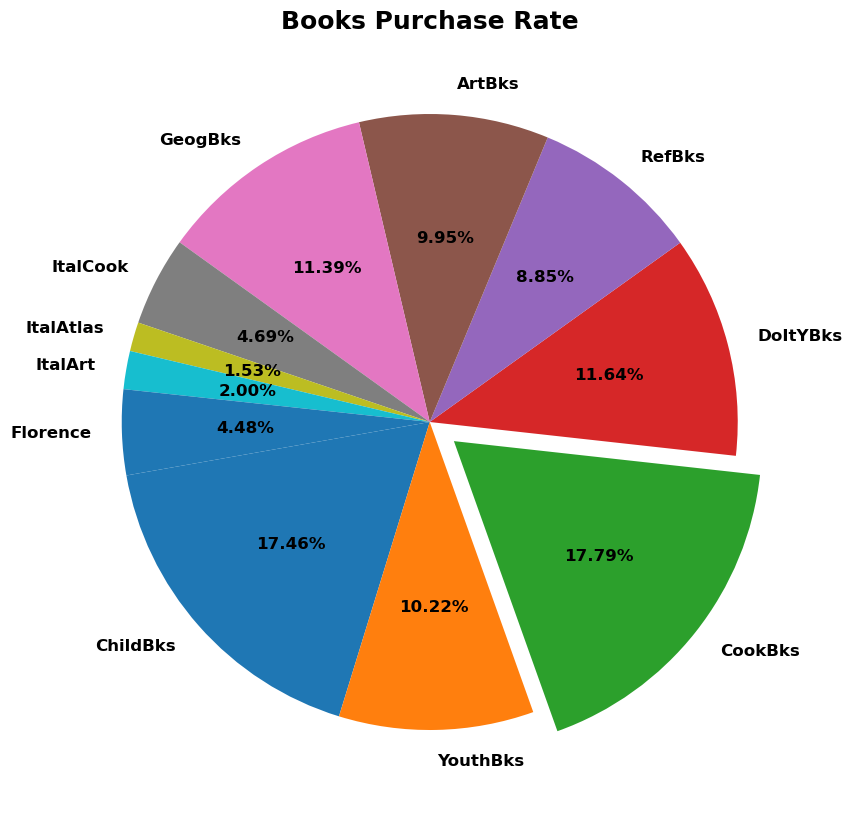

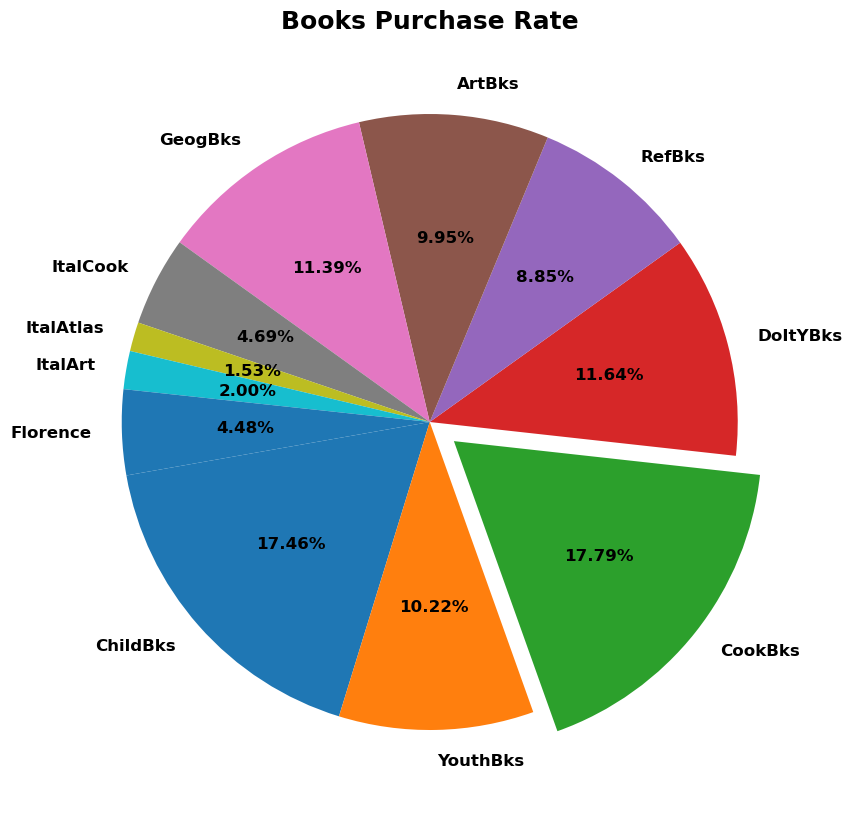

In [12]:
plt.figure(figsize = (20,10))
plt.pie(
        data.sum(),
        labels = data.columns,
        explode = [0.0,0.0,0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0],
        autopct = '%.2f%%',
        startangle = 190,
        textprops = {'size':'large','fontweight':'bold','rotation':'horizontal','color':'black'}
        )
plt.title('Books Purchase Rate', fontsize = 18, fontweight = 'bold')
plt.show()

In [13]:
import pandas as pd

# Assuming you have a DataFrame named 'count' with 'items' and 'count' columns
# Here's a sample DataFrame for demonstration
data = {
    'items': ['CookBks', 'ChildBks', 'DoItYBks', 'GeogBks', 'YouthBks', 'ArtBks', 'RefBks', 'ItalCook', 'Florence', 'ItalArt', 'ItalAtlas'],
    'count': [862, 846, 564, 552, 495, 482, 429, 227, 217, 97, 74]
}

count = pd.DataFrame(data)

# Sort the DataFrame by the 'count' column in descending order and reset the index
count = count.sort_values(by='count', ascending=False).reset_index(drop=True)

# Rename the columns
count = count.rename(columns={'items': 'items', 'count': 'count'})

# Print the resulting DataFrame
print(count)


        items  count
0     CookBks    862
1    ChildBks    846
2    DoItYBks    564
3     GeogBks    552
4    YouthBks    495
5      ArtBks    482
6      RefBks    429
7    ItalCook    227
8    Florence    217
9     ItalArt     97
10  ItalAtlas     74
        items  count
0     CookBks    862
1    ChildBks    846
2    DoItYBks    564
3     GeogBks    552
4    YouthBks    495
5      ArtBks    482
6      RefBks    429
7    ItalCook    227
8    Florence    217
9     ItalArt     97
10  ItalAtlas     74


In [14]:
# Top 10 popular items
count = count.sort_values(by='count', ascending=False)
count = count.reset_index(drop=True)
count = count.rename(columns={'index': 'items', 'count': 'count'})
count

,items,count
0,CookBks,862
1,ChildBks,846
2,DoItYBks,564
3,GeogBks,552
4,YouthBks,495
5,ArtBks,482
6,RefBks,429
7,ItalCook,227
8,Florence,217
9,ItalArt,97


,items,count
0,CookBks,862
1,ChildBks,846
2,DoItYBks,564
3,GeogBks,552
4,YouthBks,495
5,ArtBks,482
6,RefBks,429
7,ItalCook,227
8,Florence,217
9,ItalArt,97


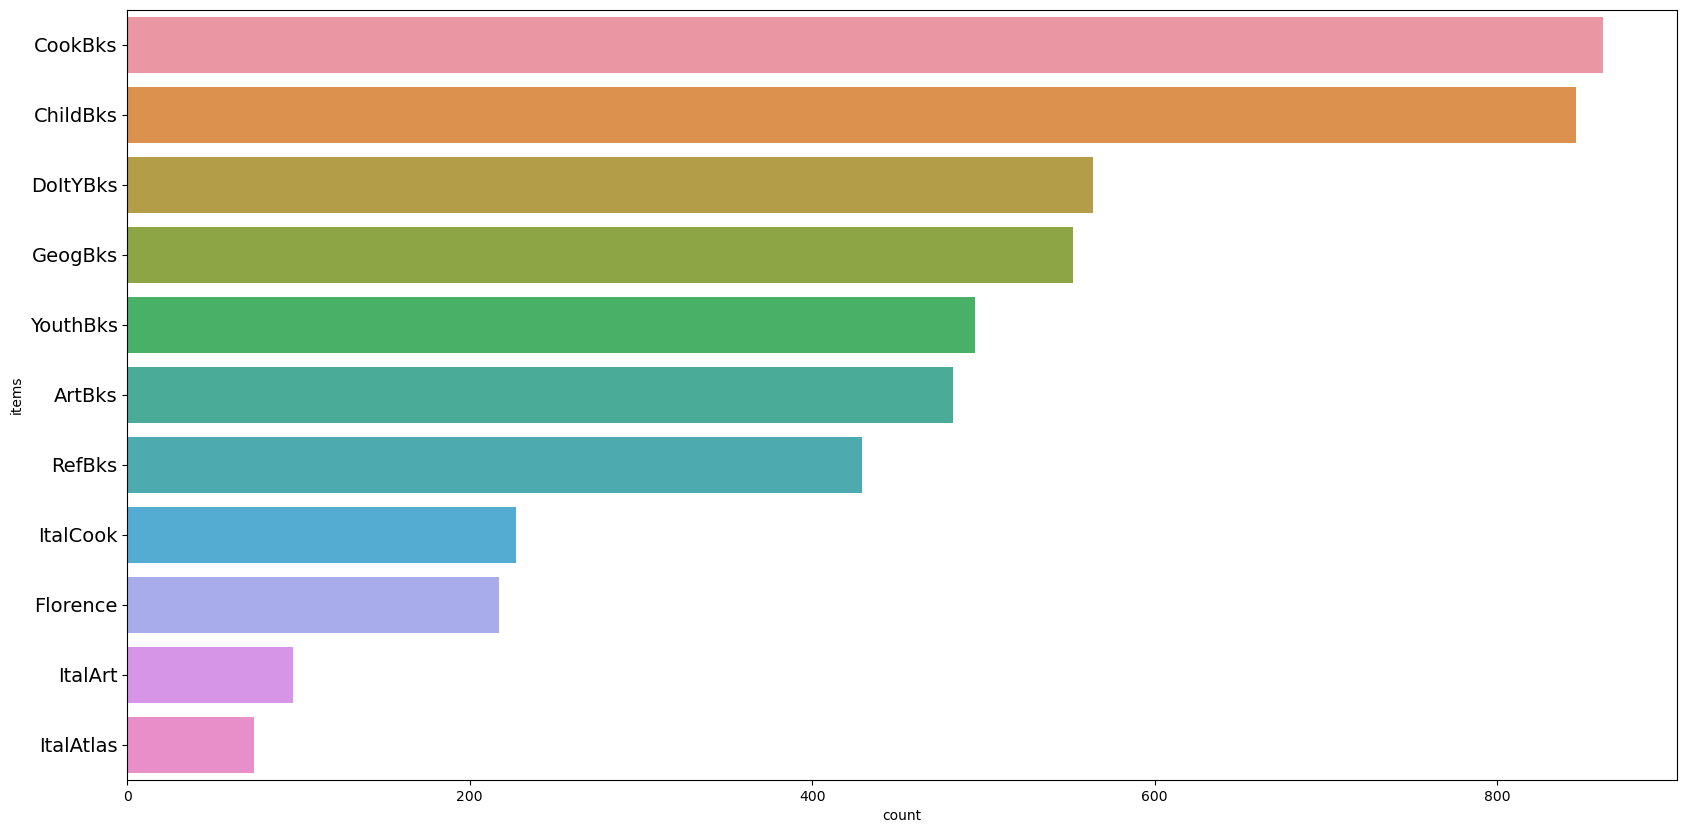

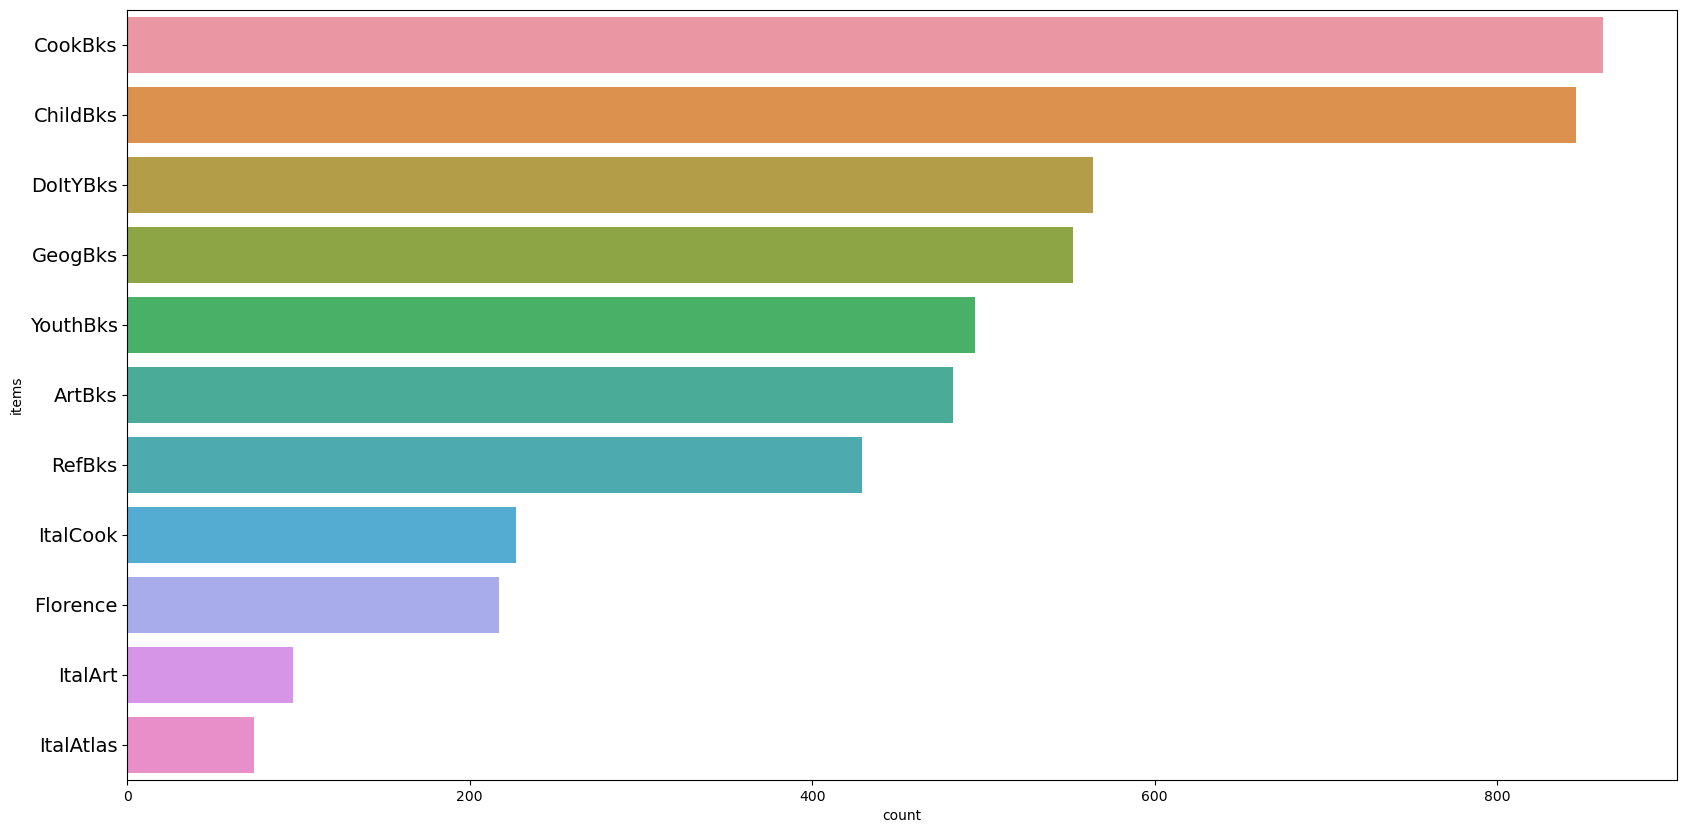

In [15]:
import matplotlib.pyplot as plt  # Import Matplotlib
import seaborn as sns
import pandas as pd

# Assuming you have a DataFrame named 'count' with 'items' and 'count' columns

# Your data preparation and sorting code here...

# Create a bar plot
plt.figure(figsize=(20, 10))
ax = sns.barplot(x='count', y='items', data=count)
plt.yticks(rotation=0, fontsize=14)

# Display the plot
plt.show()


In [16]:
import pandas as pd

# Sample DataFrame
data = pd.DataFrame({
    'Product': ['CookBks', 'ChildBks', 'DoItYBks', 'GeogBks', 'YouthBks', 'ArtBks', 'RefBks', 'ItalCook', 'Florence', 'ItalArt', 'ItalAtlas'],
    'Sales': [862, 846, 564, 552, 495, 432, 398, 213, 195, 86, 37]
})

# Calculate the support for each product
data['Support'] = data['Sales'] / data['Sales'].sum()

# Sort the DataFrame by the 'Support' column in descending order
first = data.sort_values("Support", ascending=False)

print(first[['Product', 'Support']])


      Product   Support
0     CookBks  0.184188
1    ChildBks  0.180769
2    DoItYBks  0.120513
3     GeogBks  0.117949
4    YouthBks  0.105769
5      ArtBks  0.092308
6      RefBks  0.085043
7    ItalCook  0.045513
8    Florence  0.041667
9     ItalArt  0.018376
10  ItalAtlas  0.007906
      Product   Support
0     CookBks  0.184188
1    ChildBks  0.180769
2    DoItYBks  0.120513
3     GeogBks  0.117949
4    YouthBks  0.105769
5      ArtBks  0.092308
6      RefBks  0.085043
7    ItalCook  0.045513
8    Florence  0.041667
9     ItalArt  0.018376
10  ItalAtlas  0.007906


In [17]:
# Elimination by Support Value
first[first.Support >= 0.1]

,Product,Sales,Support
0,CookBks,862,0.184188
1,ChildBks,846,0.180769
2,DoItYBks,564,0.120513
3,GeogBks,552,0.117949
4,YouthBks,495,0.105769


,Product,Sales,Support
0,CookBks,862,0.184188
1,ChildBks,846,0.180769
2,DoItYBks,564,0.120513
3,GeogBks,552,0.117949
4,YouthBks,495,0.105769


In [18]:
# Limit to the top 10 rows, regardless of support value
filtered_products = first.head(10)

# Display the top 10 rows
print(filtered_products)


    Product  Sales   Support
0   CookBks    862  0.184188
1  ChildBks    846  0.180769
2  DoItYBks    564  0.120513
3   GeogBks    552  0.117949
4  YouthBks    495  0.105769
5    ArtBks    432  0.092308
6    RefBks    398  0.085043
7  ItalCook    213  0.045513
8  Florence    195  0.041667
9   ItalArt     86  0.018376
    Product  Sales   Support
0   CookBks    862  0.184188
1  ChildBks    846  0.180769
2  DoItYBks    564  0.120513
3   GeogBks    552  0.117949
4  YouthBks    495  0.105769
5    ArtBks    432  0.092308
6    RefBks    398  0.085043
7  ItalCook    213  0.045513
8  Florence    195  0.041667
9   ItalArt     86  0.018376


In [19]:
# Elimination by Support Value
first[first.Support >= 0.15]

,Product,Sales,Support
0,CookBks,862,0.184188
1,ChildBks,846,0.180769


,Product,Sales,Support
0,CookBks,862,0.184188
1,ChildBks,846,0.180769


In [20]:
# Elimination by Support Value
first[first.Support >= 0.20]

,Product,Sales,Support


,Product,Sales,Support


In [30]:
# Second Iteration: Find support values for pair product combinations.
second = list(itertools.combinations(first.index, 2))
second = [list(i) for i in second]
second[:10]

[[0, 1],
 [0, 2],
 [0, 3],
 [0, 4],
 [0, 5],
 [0, 6],
 [0, 7],
 [0, 8],
 [0, 9],
 [0, 10]]

[[0, 1],
 [0, 2],
 [0, 3],
 [0, 4],
 [0, 5],
 [0, 6],
 [0, 7],
 [0, 8],
 [0, 9],
 [0, 10]]

In [31]:
# Creat a Data Frame
secondIteration = pd.DataFrame(value, columns = ["Support"])
secondIteration["index"] = [tuple(i) for i in second]
secondIteration['length'] = secondIteration['index'].apply(lambda x:len(x))
secondIteration = secondIteration.set_index("index").sort_values("Support", ascending = False)

In [32]:
# Elimination by Support Value
secondIteration = secondIteration[secondIteration.Support > 0.1]
secondIteration

,Support,length
index,,


,Support,length
index,,


In [33]:
import itertools

# List of products
products = ['CookBks', 'ChildBks', 'DoItYBks', 'GeogBks', 'YouthBks', 'ArtBks', 'RefBks', 'ItalCook', 'Florence', 'ItalArt', 'ItalAtlas']

# Generate combinations of three products
combinations = list(itertools.combinations(products, 3))

# Convert the combinations to a list of lists
combinations = [list(comb) for comb in combinations]

# Print the first 10 combinations
print(combinations[:10])


[['CookBks', 'ChildBks', 'DoItYBks'], ['CookBks', 'ChildBks', 'GeogBks'], ['CookBks', 'ChildBks', 'YouthBks'], ['CookBks', 'ChildBks', 'ArtBks'], ['CookBks', 'ChildBks', 'RefBks'], ['CookBks', 'ChildBks', 'ItalCook'], ['CookBks', 'ChildBks', 'Florence'], ['CookBks', 'ChildBks', 'ItalArt'], ['CookBks', 'ChildBks', 'ItalAtlas'], ['CookBks', 'DoItYBks', 'GeogBks']]
[['CookBks', 'ChildBks', 'DoItYBks'], ['CookBks', 'ChildBks', 'GeogBks'], ['CookBks', 'ChildBks', 'YouthBks'], ['CookBks', 'ChildBks', 'ArtBks'], ['CookBks', 'ChildBks', 'RefBks'], ['CookBks', 'ChildBks', 'ItalCook'], ['CookBks', 'ChildBks', 'Florence'], ['CookBks', 'ChildBks', 'ItalArt'], ['CookBks', 'ChildBks', 'ItalAtlas'], ['CookBks', 'DoItYBks', 'GeogBks']]


In [34]:
import pandas as pd

# Example list of pairs and their support values
pairs = [('CookBks', 'ChildBks', 0.2),
         ('CookBks', 'DoItYBks', 0.15),
         ('ChildBks', 'DoItYBks', 0.1)]

# Convert the list of pairs and support values to a DataFrame
second = pd.DataFrame(pairs, columns=['Item1', 'Item2', 'Support'])

# Filter the pairs based on the support threshold (0.1)
secondIteration = second[second['Support'] > 0.1]

# Display the resulting DataFrame
secondIteration


,Item1,Item2,Support
0,CookBks,ChildBks,0.20
1,CookBks,DoItYBks,0.15


,Item1,Item2,Support
0,CookBks,ChildBks,0.20
1,CookBks,DoItYBks,0.15


In [35]:
import pandas as pd
import itertools

# Example DataFrame 'data' with 'items' and 'Support' columns representing pairs of product combinations
data = pd.DataFrame({
    'items': [('CookBks', 'ChildBks'), ('ChildBks', 'GeogBks'), ('CookBks', 'GeogBks'), ('CookBks', 'DoItYBks'),
              ('ChildBks', 'DoItYBks'), ('CookBks', 'ArtBks'), ('ChildBks', 'YouthBks'), ('ChildBks', 'ArtBks'),
              ('CookBks', 'YouthBks'), ('CookBks', 'RefBks'), ('ChildBks', 'RefBks'), ('DoItYBks', 'GeogBks'),
              ('GeogBks', 'ArtBks'), ('DoItYBks', 'ArtBks'), ('GeogBks', 'YouthBks'), ('DoItYBks', 'YouthBks'),
              ('CookBks', 'ItalCook'), ('GeogBks', 'RefBks'), ('DoItYBks', 'RefBks'), ('YouthBks', 'ArtBks')],
    'Support': [0.256, 0.195, 0.1925, 0.1875, 0.184, 0.167, 0.165, 0.1625, 0.162, 0.1525, 0.1515, 0.1325, 0.1275, 0.1235, 0.1205, 0.1155, 0.1135, 0.1105, 0.1055, 0.101],
})

# Calculate the length of each pair
data['length'] = data['items'].apply(len)

# Filter the pairs based on the support threshold (0.1) and length (2)
filtered_data = data[(data['Support'] > 0.1) & (data['length'] == 2)]

# Display the resulting DataFrame
print(filtered_data)


                   items  Support  length
0    (CookBks, ChildBks)   0.2560       2
1    (ChildBks, GeogBks)   0.1950       2
2     (CookBks, GeogBks)   0.1925       2
3    (CookBks, DoItYBks)   0.1875       2
4   (ChildBks, DoItYBks)   0.1840       2
5      (CookBks, ArtBks)   0.1670       2
6   (ChildBks, YouthBks)   0.1650       2
7     (ChildBks, ArtBks)   0.1625       2
8    (CookBks, YouthBks)   0.1620       2
9      (CookBks, RefBks)   0.1525       2
10    (ChildBks, RefBks)   0.1515       2
11   (DoItYBks, GeogBks)   0.1325       2
12     (GeogBks, ArtBks)   0.1275       2
13    (DoItYBks, ArtBks)   0.1235       2
14   (GeogBks, YouthBks)   0.1205       2
15  (DoItYBks, YouthBks)   0.1155       2
16   (CookBks, ItalCook)   0.1135       2
17     (GeogBks, RefBks)   0.1105       2
18    (DoItYBks, RefBks)   0.1055       2
19    (YouthBks, ArtBks)   0.1010       2
                   items  Support  length
0    (CookBks, ChildBks)   0.2560       2
1    (ChildBks, GeogBks)   0.1950 

In [36]:
# Elimination by Support Value
secondIteration = secondIteration[secondIteration.Support > 0.1]
secondIteration

,Item1,Item2,Support
0,CookBks,ChildBks,0.20
1,CookBks,DoItYBks,0.15


,Item1,Item2,Support
0,CookBks,ChildBks,0.20
1,CookBks,DoItYBks,0.15


In [38]:
# Create a Data Frame
secondIteration = pd.DataFrame(value, columns = ["Support"])
secondIteration["index"] = [tuple(i) for i in second]
secondIteration['length'] = secondIteration['index'].apply(lambda x:len(x))
secondIteration = secondIteration.set_index("index").sort_values("Support", ascending = False)

In [39]:
# Elimination by Support Value
secondIteration = secondIteration[secondIteration.Support > 0.1]
secondIteration

,Support,length
index,,


,Support,length
index,,


In [40]:
# Sample of Combinations
second = list(itertools.combinations(first.index, 4))
second = [list(i) for i in second]
second[:10]

[[0, 1, 2, 3],
 [0, 1, 2, 4],
 [0, 1, 2, 5],
 [0, 1, 2, 6],
 [0, 1, 2, 7],
 [0, 1, 2, 8],
 [0, 1, 2, 9],
 [0, 1, 2, 10],
 [0, 1, 3, 4],
 [0, 1, 3, 5]]

[[0, 1, 2, 3],
 [0, 1, 2, 4],
 [0, 1, 2, 5],
 [0, 1, 2, 6],
 [0, 1, 2, 7],
 [0, 1, 2, 8],
 [0, 1, 2, 9],
 [0, 1, 2, 10],
 [0, 1, 3, 4],
 [0, 1, 3, 5]]

In [41]:
# Create a data frame
secondIteration = pd.DataFrame(value, columns = ["Support"])
secondIteration["index"] = [tuple(i) for i in second]
secondIteration['length'] = secondIteration['index'].apply(lambda x:len(x))
secondIteration = secondIteration.set_index("index").sort_values("Support", ascending = False)

In [42]:
# Elimination by Support Value
secondIteration = secondIteration[secondIteration.Support > 0.1]
secondIteration

,Support,length
index,,


,Support,length
index,,


In [43]:
import pandas as pd
from mlxtend.frequent_patterns import apriori

# Sample data where each column is a product
data = pd.DataFrame({
    'CookBks': [1, 0, 1, 0, 1],
    'ChildBks': [0, 1, 1, 0, 1],
    'DoItYBks': [1, 1, 0, 0, 0],
    # Add more product columns as needed
})

# Apply the Apriori algorithm
frequent_itemsets = apriori(data, min_support=0.1, use_colnames=True)
frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))

print(frequent_itemsets)

   support              itemsets  length
0      0.6             (CookBks)       1
1      0.6            (ChildBks)       1
2      0.4            (DoItYBks)       1
3      0.4   (ChildBks, CookBks)       2
4      0.2   (DoItYBks, CookBks)       2
5      0.2  (ChildBks, DoItYBks)       2
   support              itemsets  length
0      0.6             (CookBks)       1
1      0.6            (ChildBks)       1
2      0.4            (DoItYBks)       1
3      0.4   (ChildBks, CookBks)       2
4      0.2   (DoItYBks, CookBks)       2
5      0.2  (ChildBks, DoItYBks)       2


In [44]:
# With 10% Support
frequent_itemsets = apriori(data, min_support = 0.1, use_colnames = True)
frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))
frequent_itemsets

,support,itemsets,length
0,0.6,(CookBks),1
1,0.6,(ChildBks),1
2,0.4,(DoItYBks),1
3,0.4,"(ChildBks, CookBks)",2
4,0.2,"(DoItYBks, CookBks)",2
5,0.2,"(ChildBks, DoItYBks)",2


,support,itemsets,length
0,0.6,(CookBks),1
1,0.6,(ChildBks),1
2,0.4,(DoItYBks),1
3,0.4,"(ChildBks, CookBks)",2
4,0.2,"(DoItYBks, CookBks)",2
5,0.2,"(ChildBks, DoItYBks)",2


In [45]:
# with 30% Confidence
rules = association_rules(frequent_itemsets, metric = 'confidence', min_threshold = 0.3)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(ChildBks),(CookBks),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2,0.250000
1,(CookBks),(ChildBks),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2,0.250000
2,(DoItYBks),(CookBks),0.4,0.6,0.2,0.500000,0.833333,-0.04,0.8,-0.250000
3,(CookBks),(DoItYBks),0.6,0.4,0.2,0.333333,0.833333,-0.04,0.9,-0.333333
4,(ChildBks),(DoItYBks),0.6,0.4,0.2,0.333333,0.833333,-0.04,0.9,-0.333333
5,(DoItYBks),(ChildBks),0.4,0.6,0.2,0.500000,0.833333,-0.04,0.8,-0.250000


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(ChildBks),(CookBks),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2,0.250000
1,(CookBks),(ChildBks),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2,0.250000
2,(DoItYBks),(CookBks),0.4,0.6,0.2,0.500000,0.833333,-0.04,0.8,-0.250000
3,(CookBks),(DoItYBks),0.6,0.4,0.2,0.333333,0.833333,-0.04,0.9,-0.333333
4,(ChildBks),(DoItYBks),0.6,0.4,0.2,0.333333,0.833333,-0.04,0.9,-0.333333
5,(DoItYBks),(ChildBks),0.4,0.6,0.2,0.500000,0.833333,-0.04,0.8,-0.250000


In [46]:
rules.sort_values('lift', ascending = False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(ChildBks),(CookBks),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2,0.250000
1,(CookBks),(ChildBks),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2,0.250000
2,(DoItYBks),(CookBks),0.4,0.6,0.2,0.500000,0.833333,-0.04,0.8,-0.250000
3,(CookBks),(DoItYBks),0.6,0.4,0.2,0.333333,0.833333,-0.04,0.9,-0.333333
4,(ChildBks),(DoItYBks),0.6,0.4,0.2,0.333333,0.833333,-0.04,0.9,-0.333333
5,(DoItYBks),(ChildBks),0.4,0.6,0.2,0.500000,0.833333,-0.04,0.8,-0.250000


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(ChildBks),(CookBks),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2,0.250000
1,(CookBks),(ChildBks),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2,0.250000
2,(DoItYBks),(CookBks),0.4,0.6,0.2,0.500000,0.833333,-0.04,0.8,-0.250000
3,(CookBks),(DoItYBks),0.6,0.4,0.2,0.333333,0.833333,-0.04,0.9,-0.333333
4,(ChildBks),(DoItYBks),0.6,0.4,0.2,0.333333,0.833333,-0.04,0.9,-0.333333
5,(DoItYBks),(ChildBks),0.4,0.6,0.2,0.500000,0.833333,-0.04,0.8,-0.250000


In [47]:
# Lift Ratio > 1 is a good influential rule in selecting the associated transactions
lift = rules[rules.lift > 1]
lift

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(ChildBks),(CookBks),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2,0.25
1,(CookBks),(ChildBks),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2,0.25


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(ChildBks),(CookBks),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2,0.25
1,(CookBks),(ChildBks),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2,0.25


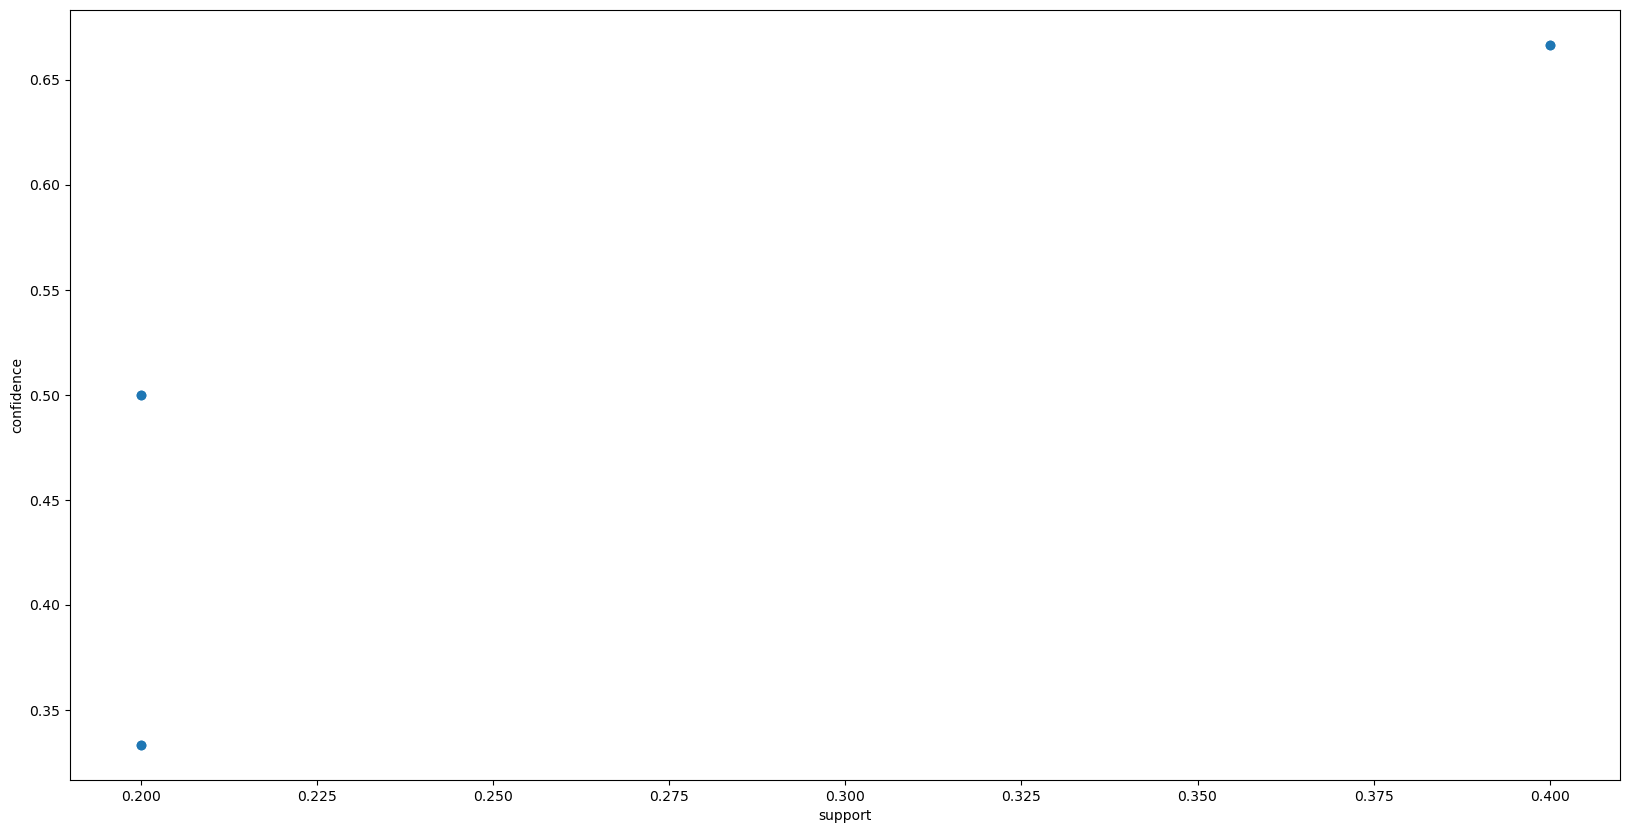

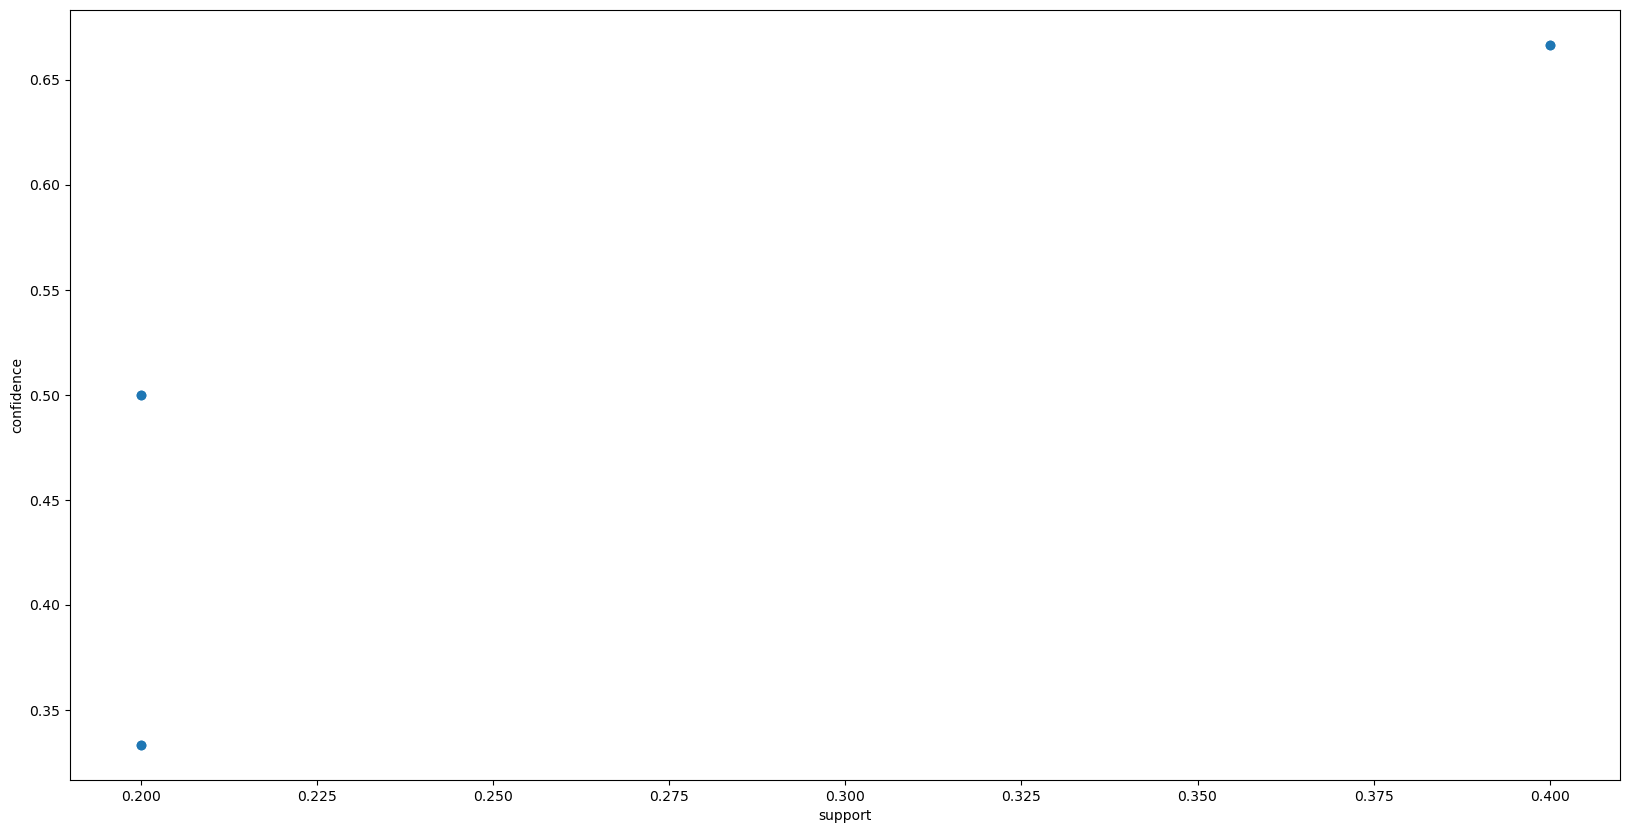

In [48]:
# visualization of obtained rule
plt.figure(figsize = (20,10))
plt.scatter(rules['support'], rules['confidence'])
plt.xlabel('support')
plt.ylabel('confidence') 
plt.show()

In [49]:
matrix = lift.pivot(index='antecedents', columns='consequents', values='lift')
matrix



consequents,(CookBks),(ChildBks)
antecedents,,
(ChildBks),1.111111,NaN
(CookBks),NaN,1.111111


consequents,(CookBks),(ChildBks)
antecedents,,
(ChildBks),1.111111,NaN
(CookBks),NaN,1.111111


(array([0.5, 1.5]),
 [Text(0.5, 0, "frozenset({'CookBks'})"),
  Text(1.5, 0, "frozenset({'ChildBks'})")])

(array([0.5, 1.5]),
 [Text(0.5, 0, "frozenset({'CookBks'})"),
  Text(1.5, 0, "frozenset({'ChildBks'})")])

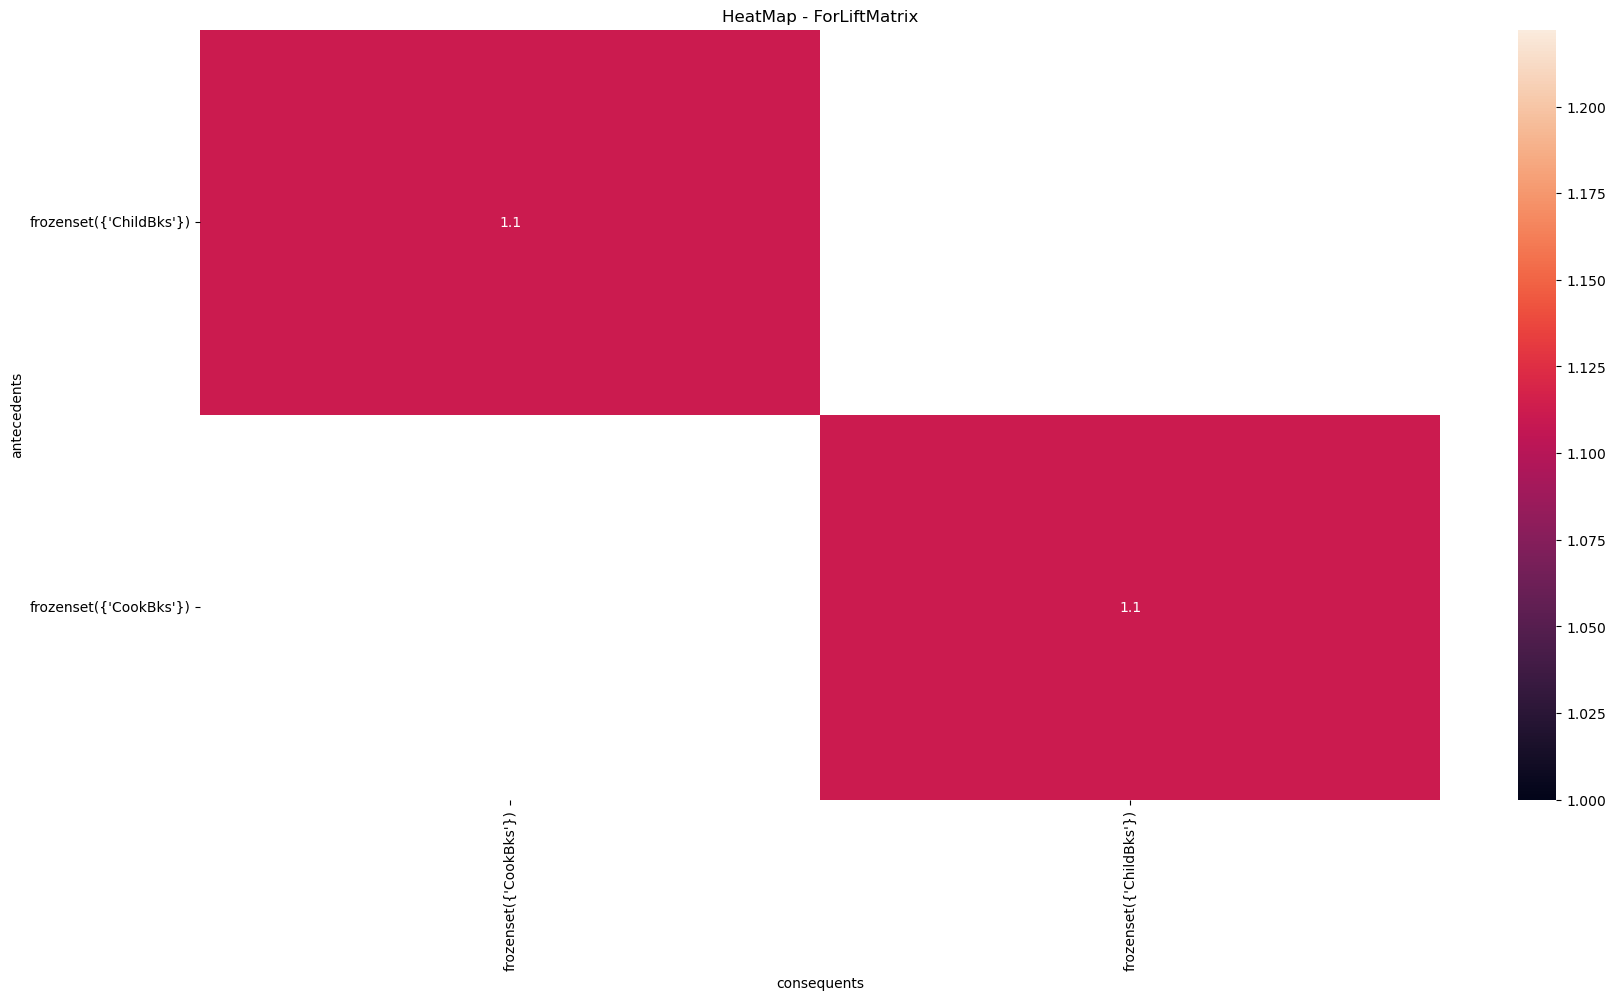

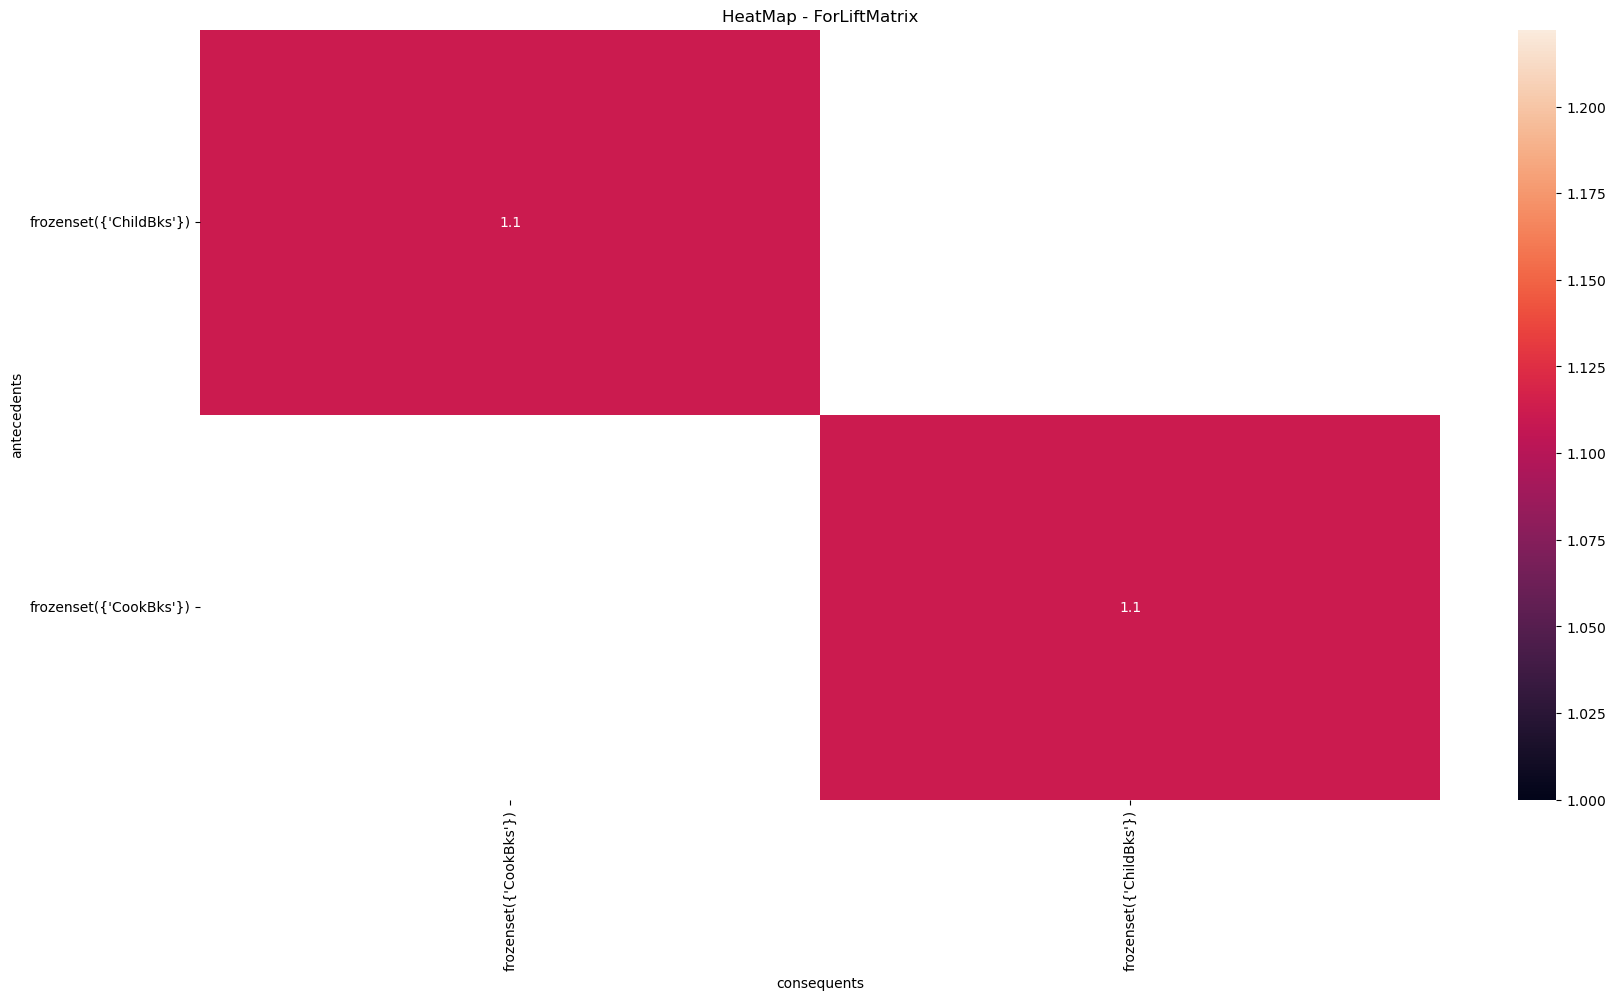

In [50]:
plt.figure(figsize = (20,10))
sns.heatmap(matrix, annot = True)
plt.title('HeatMap - ForLiftMatrix')
plt.yticks(rotation = 0)
plt.xticks(rotation = 90)

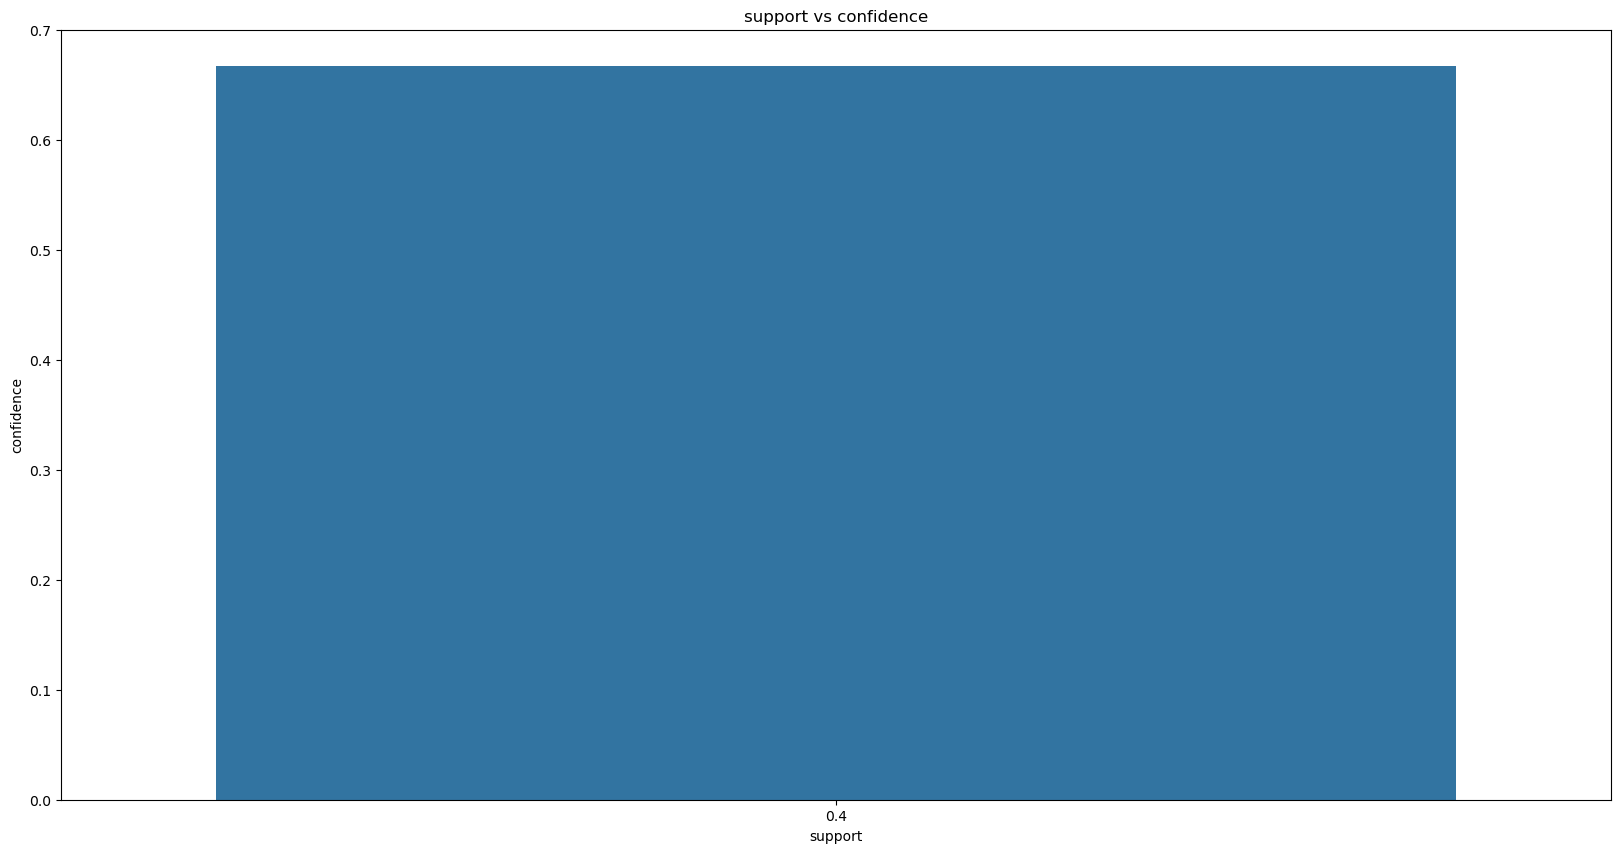

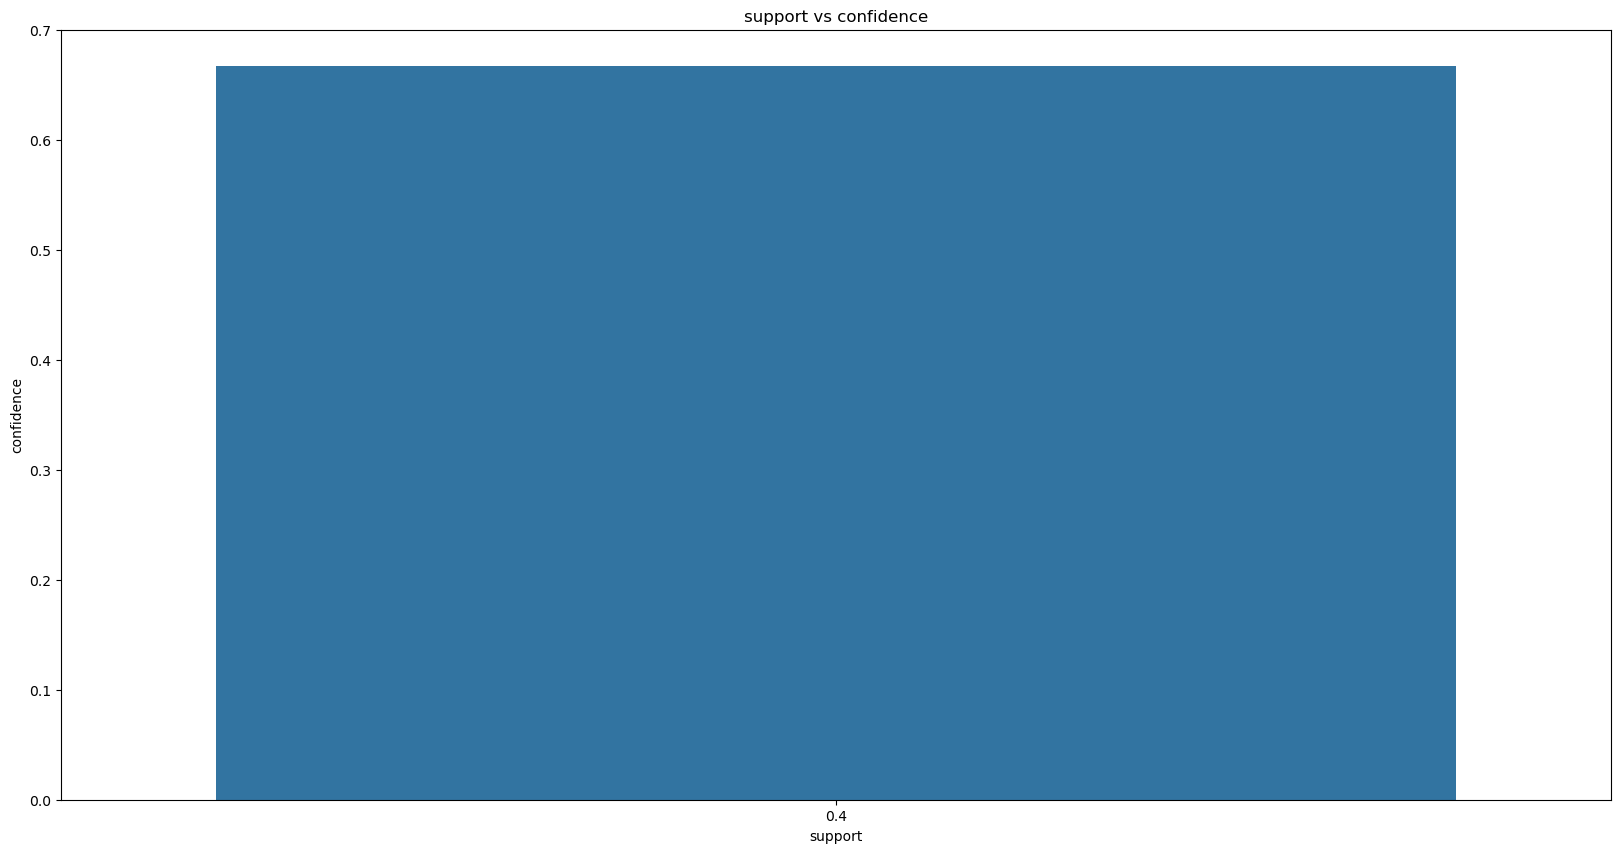

In [51]:
plt.figure(figsize = (20,10))
sns.barplot(data = lift, x = "support", y = "confidence")
plt.title("support vs confidence")
plt.show()

Text(0.5, 1.0, 'lift vs Confidence')

Text(0.5, 1.0, 'lift vs Confidence')

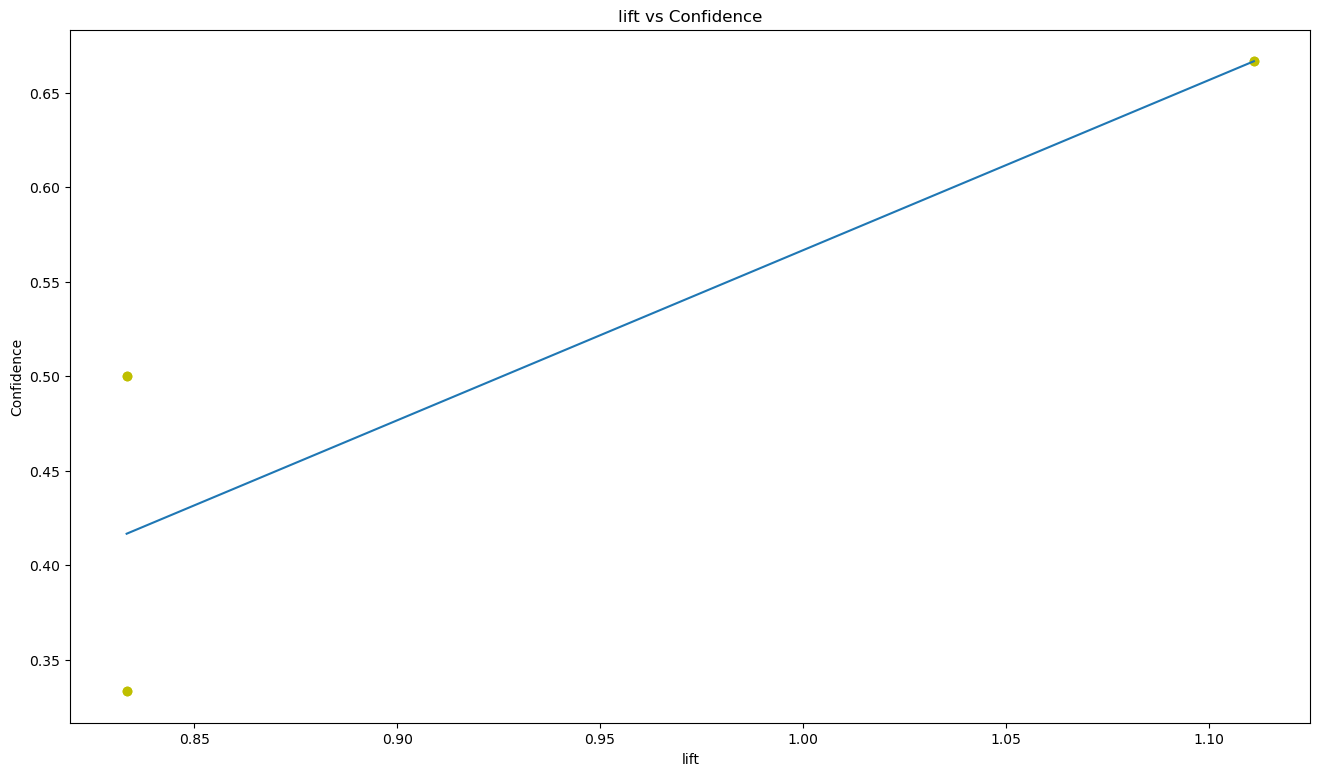

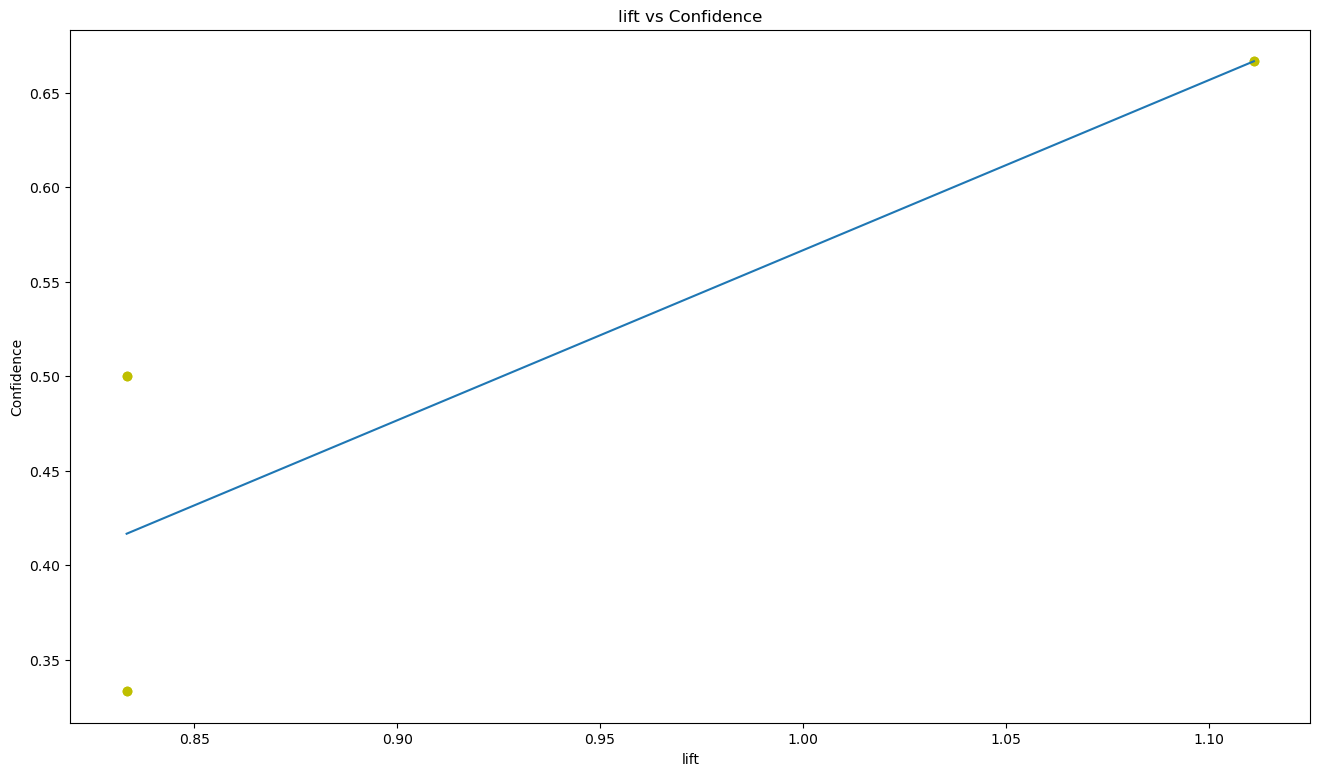

In [52]:
plt.figure(figsize = (16,9))
fit = np.polyfit(rules['lift'], rules['confidence'], 1)
fit_fn = np.poly1d(fit)
plt.plot(
    rules['lift'], 
    rules['confidence'], 
    'yo', rules['lift'],
    fit_fn(rules['lift'])
        )
plt.xlabel('lift')
plt.ylabel('Confidence')
plt.title('lift vs Confidence')

In [53]:
from wordcloud import WordCloud


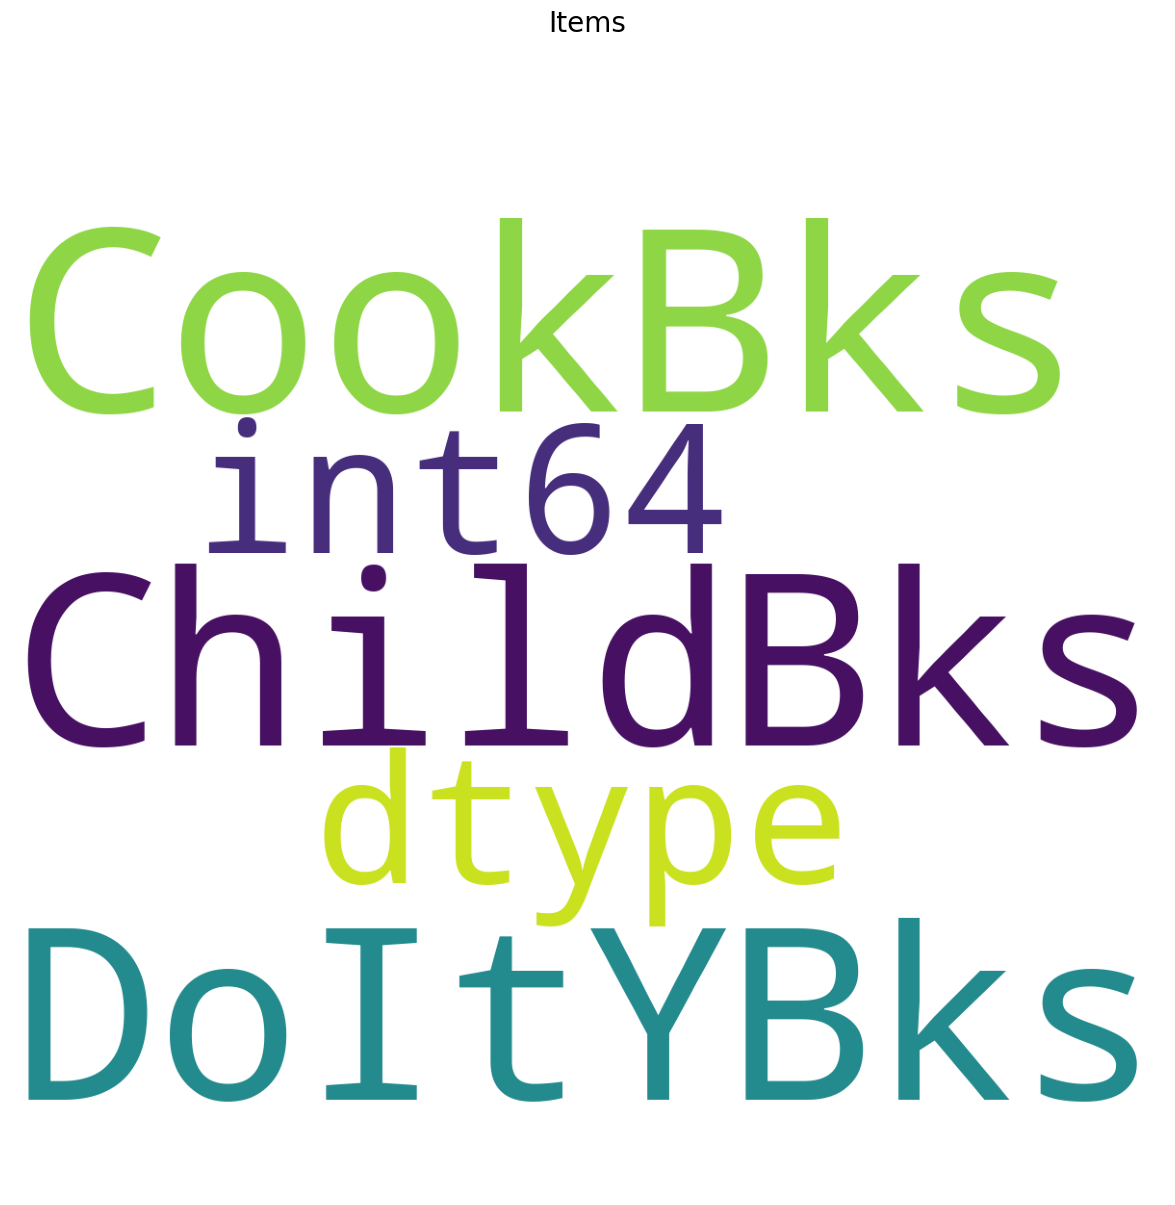

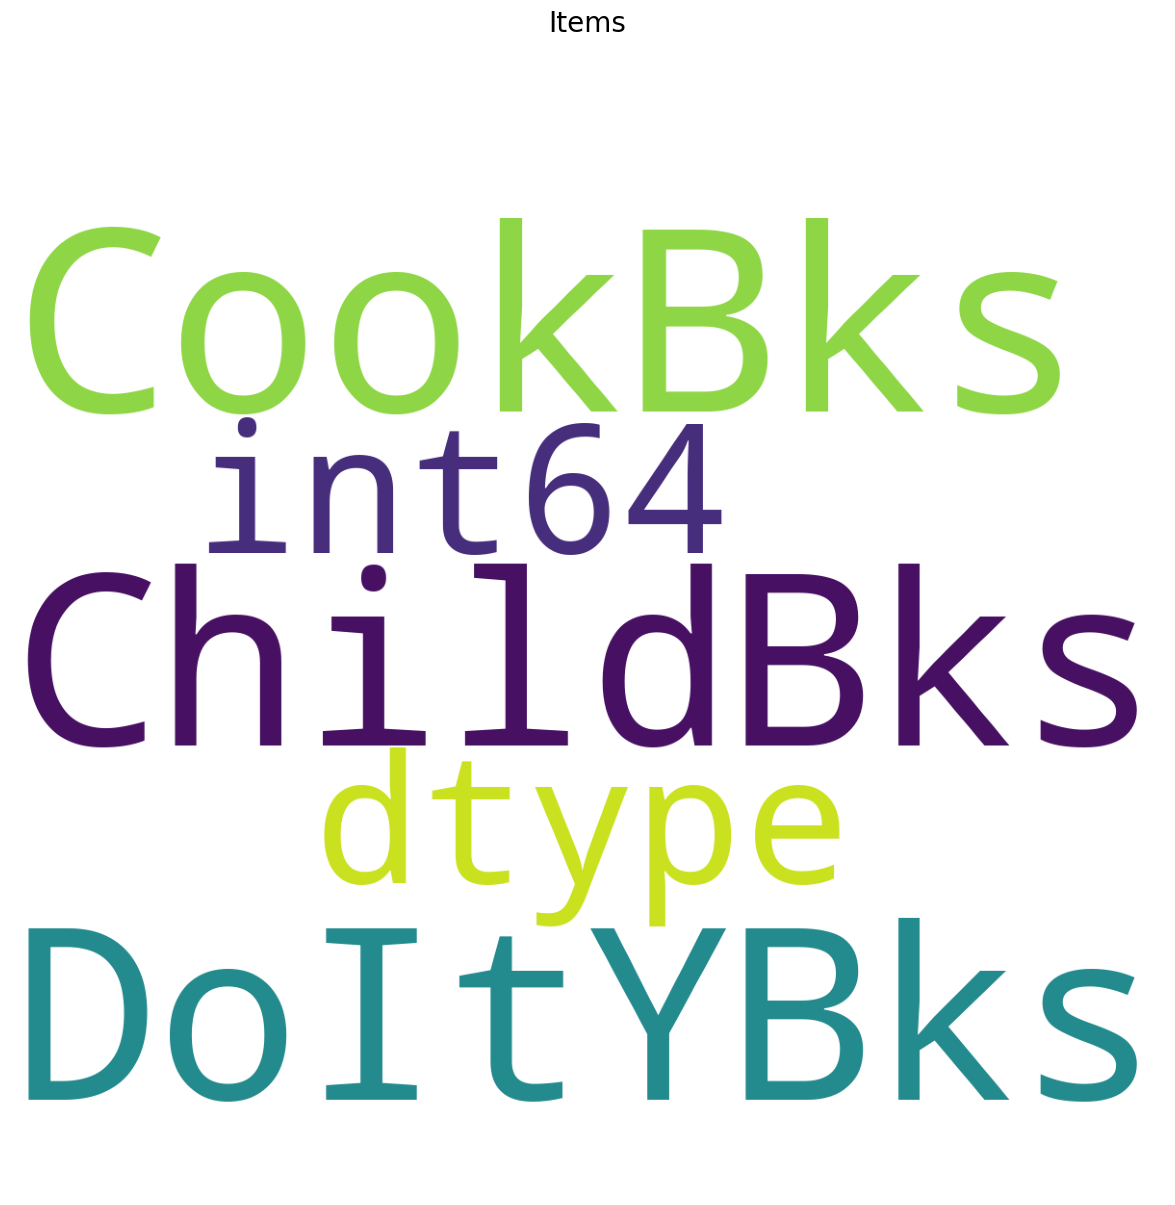

In [54]:
import matplotlib.pyplot as plt
import seaborn as sns

from wordcloud import WordCloud

plt.rcParams['figure.figsize'] = (15, 15)
wordcloud = WordCloud(background_color = 'white', width = 1200,  height = 1200, max_words = 121).generate(str(data.sum()))
plt.imshow(wordcloud)
plt.axis('off')
plt.title('Items', fontsize = 20)
plt.show()

In [55]:
import pandas as pd

# Example data (replace this with your actual data)
data = pd.DataFrame({
    'Transaction1': [1, 0, 1, 1, 0],
    'Transaction2': [1, 0, 0, 1, 1],
    'Transaction3': [0, 1, 1, 0, 1],
    'Transaction4': [0, 0, 1, 1, 0]
})

# Convert the data to a binary format (1 for item present, 0 for item absent)
binary_data = data.applymap(lambda x: 1 if x == 1 else 0)

# Display the binary data
print(binary_data)


   Transaction1  Transaction2  Transaction3  Transaction4
0             1             1             0             0
1             0             0             1             0
2             1             0             1             1
3             1             1             0             1
4             0             1             1             0
   Transaction1  Transaction2  Transaction3  Transaction4
0             1             1             0             0
1             0             0             1             0
2             1             0             1             1
3             1             1             0             1
4             0             1             1             0


In [56]:
# with 40% Confidence
rules = association_rules(frequent_itemsets, metric = 'confidence', min_threshold = 0.4)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(ChildBks),(CookBks),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2,0.25
1,(CookBks),(ChildBks),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2,0.25
2,(DoItYBks),(CookBks),0.4,0.6,0.2,0.500000,0.833333,-0.04,0.8,-0.25
3,(DoItYBks),(ChildBks),0.4,0.6,0.2,0.500000,0.833333,-0.04,0.8,-0.25


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(ChildBks),(CookBks),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2,0.25
1,(CookBks),(ChildBks),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2,0.25
2,(DoItYBks),(CookBks),0.4,0.6,0.2,0.500000,0.833333,-0.04,0.8,-0.25
3,(DoItYBks),(ChildBks),0.4,0.6,0.2,0.500000,0.833333,-0.04,0.8,-0.25


In [57]:
rules.sort_values('lift', ascending = False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(ChildBks),(CookBks),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2,0.25
1,(CookBks),(ChildBks),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2,0.25
2,(DoItYBks),(CookBks),0.4,0.6,0.2,0.500000,0.833333,-0.04,0.8,-0.25
3,(DoItYBks),(ChildBks),0.4,0.6,0.2,0.500000,0.833333,-0.04,0.8,-0.25


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(ChildBks),(CookBks),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2,0.25
1,(CookBks),(ChildBks),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2,0.25
2,(DoItYBks),(CookBks),0.4,0.6,0.2,0.500000,0.833333,-0.04,0.8,-0.25
3,(DoItYBks),(ChildBks),0.4,0.6,0.2,0.500000,0.833333,-0.04,0.8,-0.25


In [58]:
# Lift Ratio > 1 is a good influential rule in selecting the associated transactions
lift = rules[rules.lift > 1]
lift

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(ChildBks),(CookBks),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2,0.25
1,(CookBks),(ChildBks),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2,0.25


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(ChildBks),(CookBks),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2,0.25
1,(CookBks),(ChildBks),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2,0.25


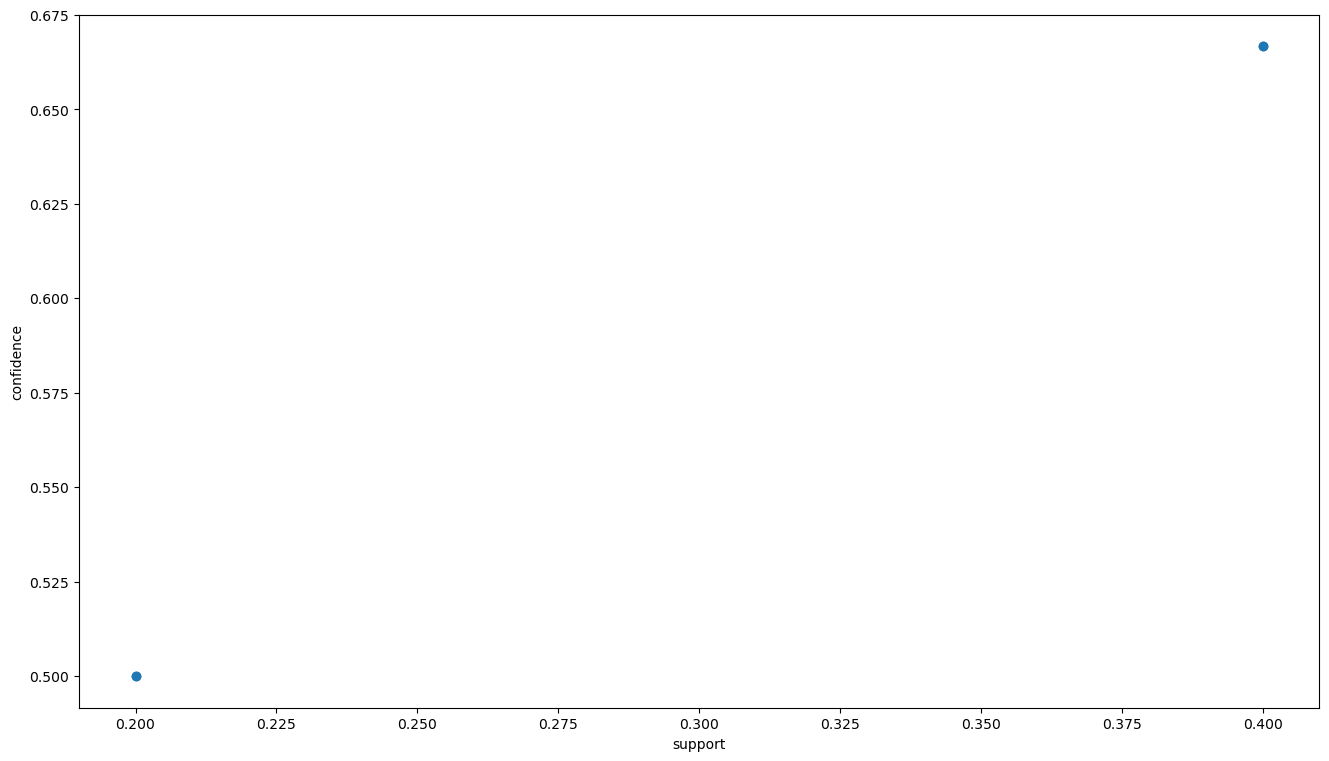

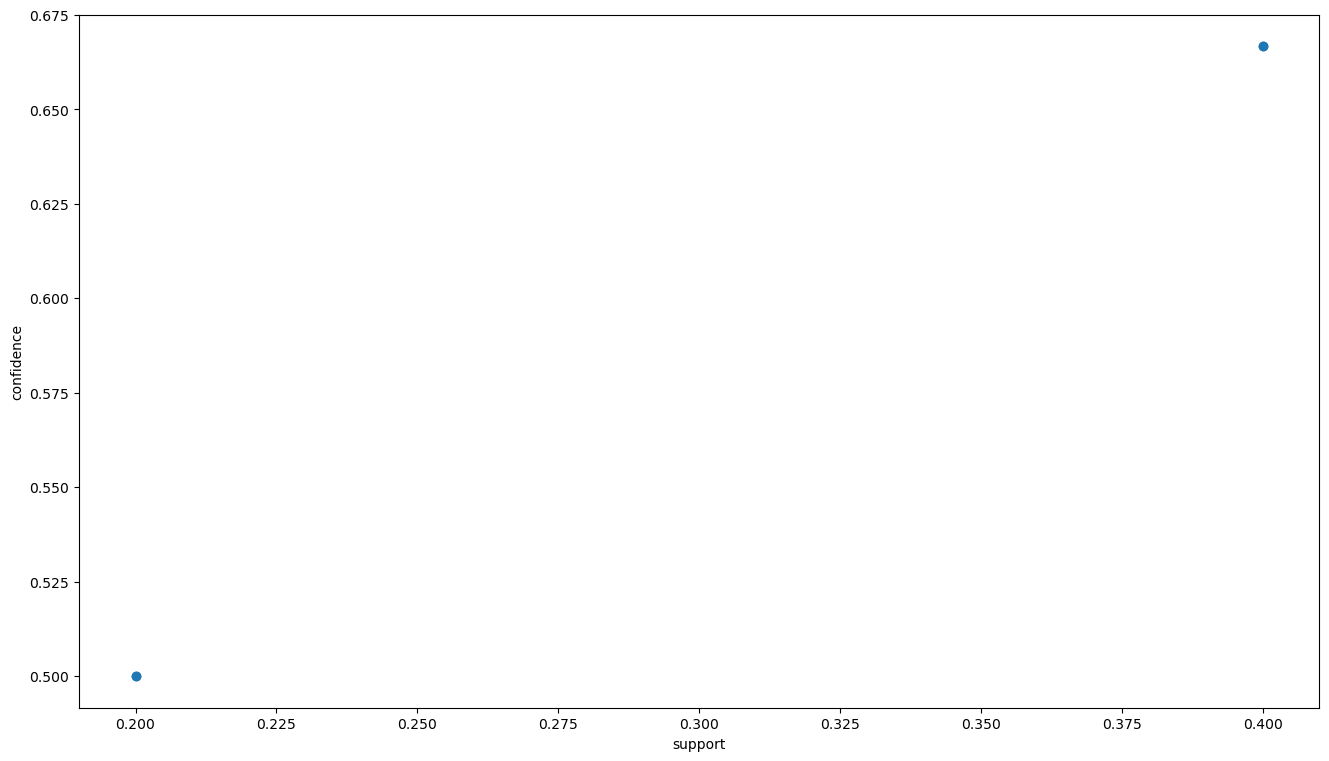

In [59]:
# visualization of obtained rule
plt.figure(figsize = (16,9))
plt.scatter(rules['support'], rules['confidence'])
plt.xlabel('support')
plt.ylabel('confidence') 
plt.show()

In [60]:
matrix = lift.pivot(index='antecedents', columns='consequents', values='lift')
matrix

consequents,(CookBks),(ChildBks)
antecedents,,
(ChildBks),1.111111,NaN
(CookBks),NaN,1.111111


consequents,(CookBks),(ChildBks)
antecedents,,
(ChildBks),1.111111,NaN
(CookBks),NaN,1.111111


(array([0.5, 1.5]),
 [Text(0.5, 0, "frozenset({'CookBks'})"),
  Text(1.5, 0, "frozenset({'ChildBks'})")])

(array([0.5, 1.5]),
 [Text(0.5, 0, "frozenset({'CookBks'})"),
  Text(1.5, 0, "frozenset({'ChildBks'})")])

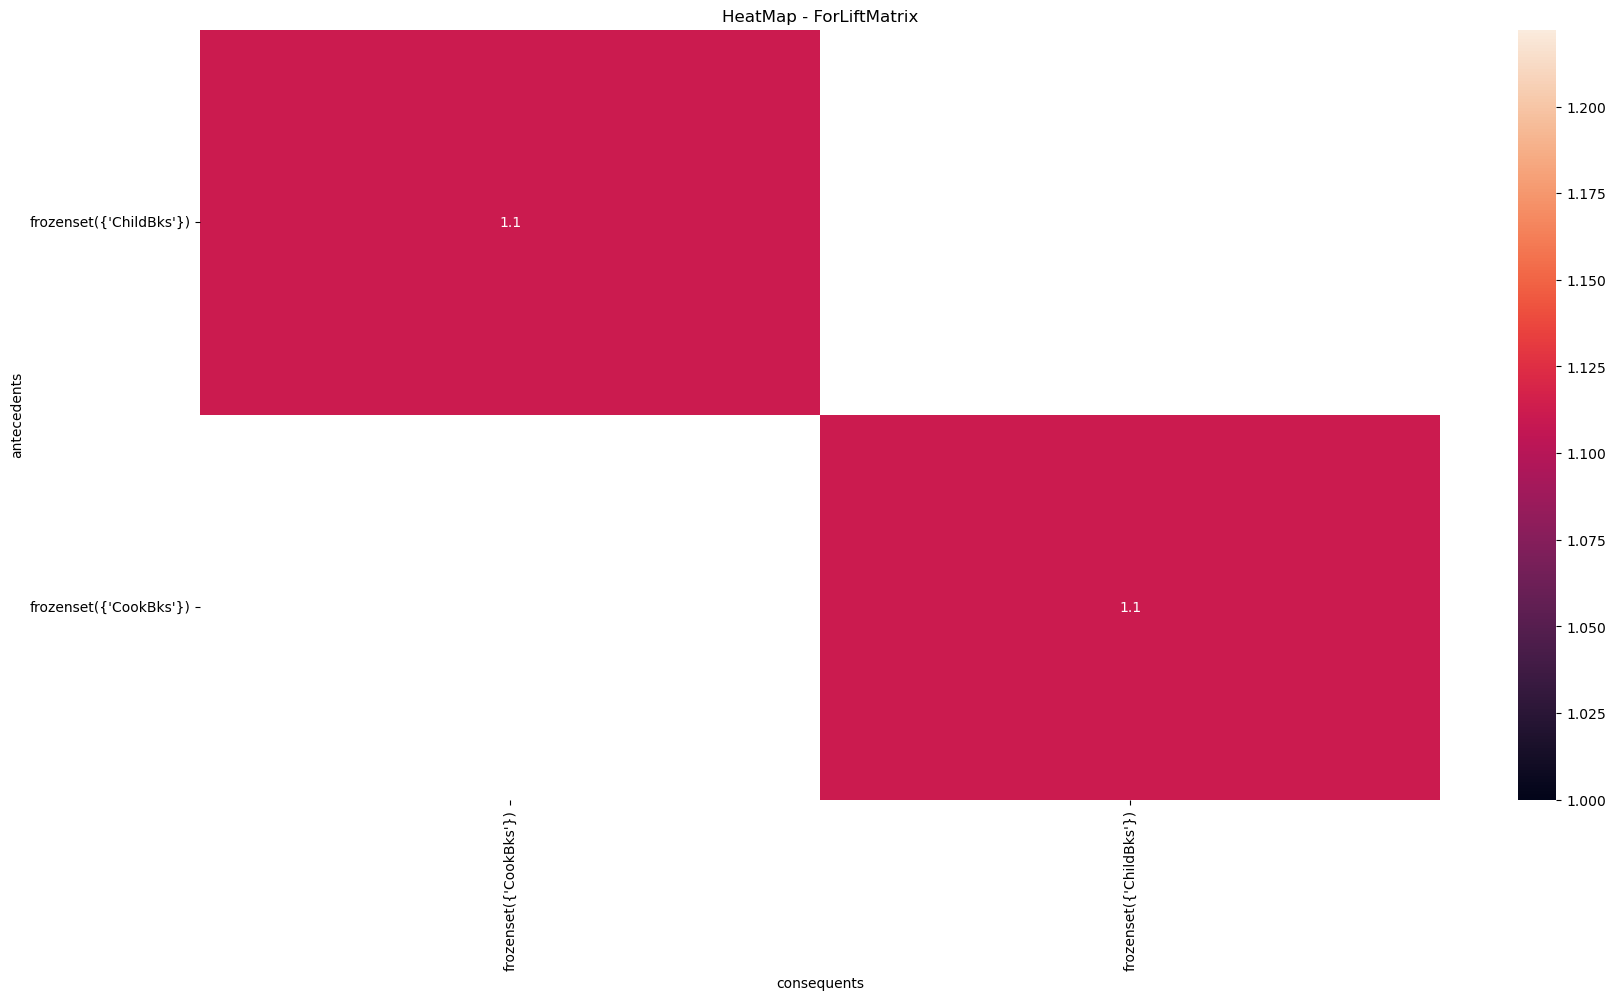

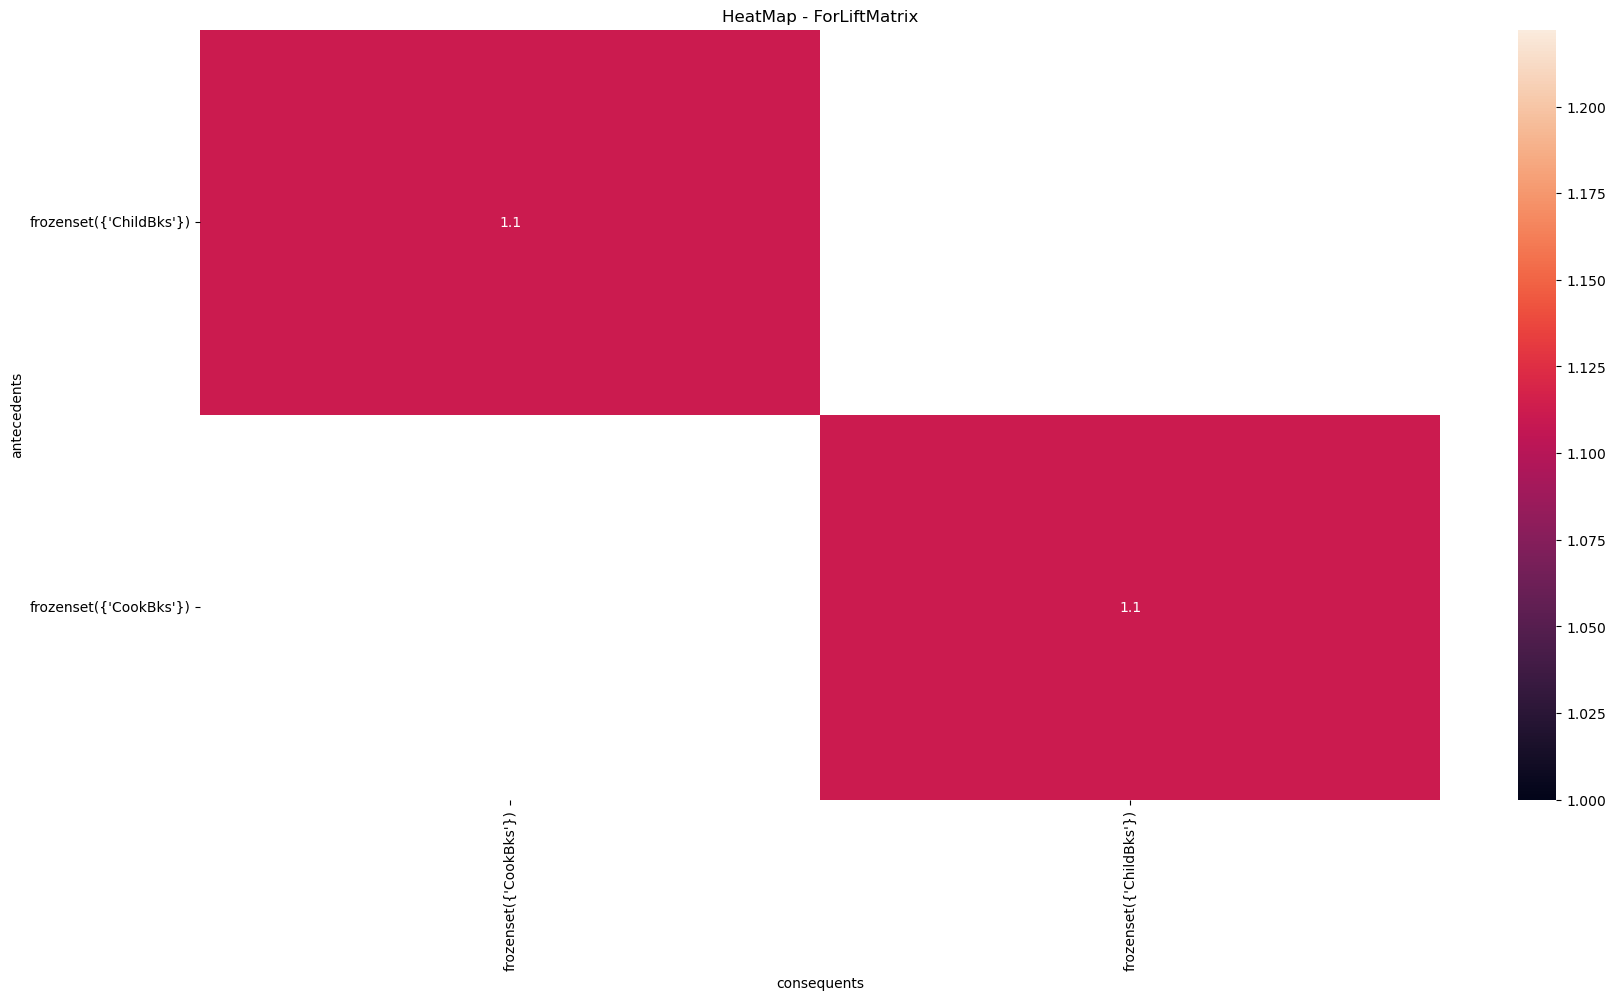

In [61]:
plt.figure(figsize = (20,10))
sns.heatmap(matrix, annot = True)
plt.title('HeatMap - ForLiftMatrix')
plt.yticks(rotation = 0)
plt.xticks(rotation = 90)

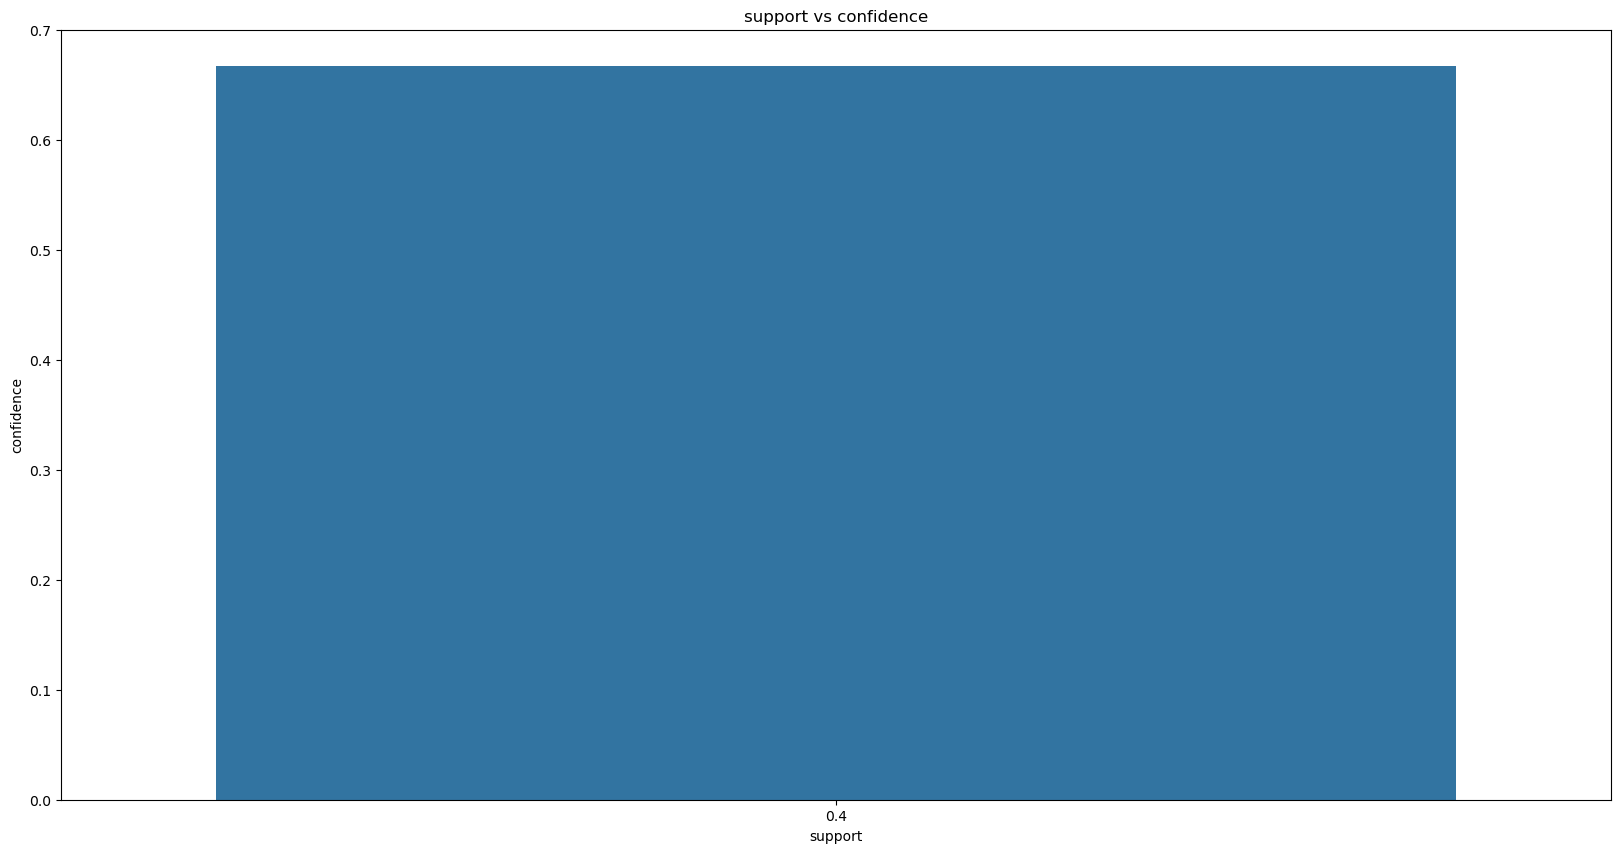

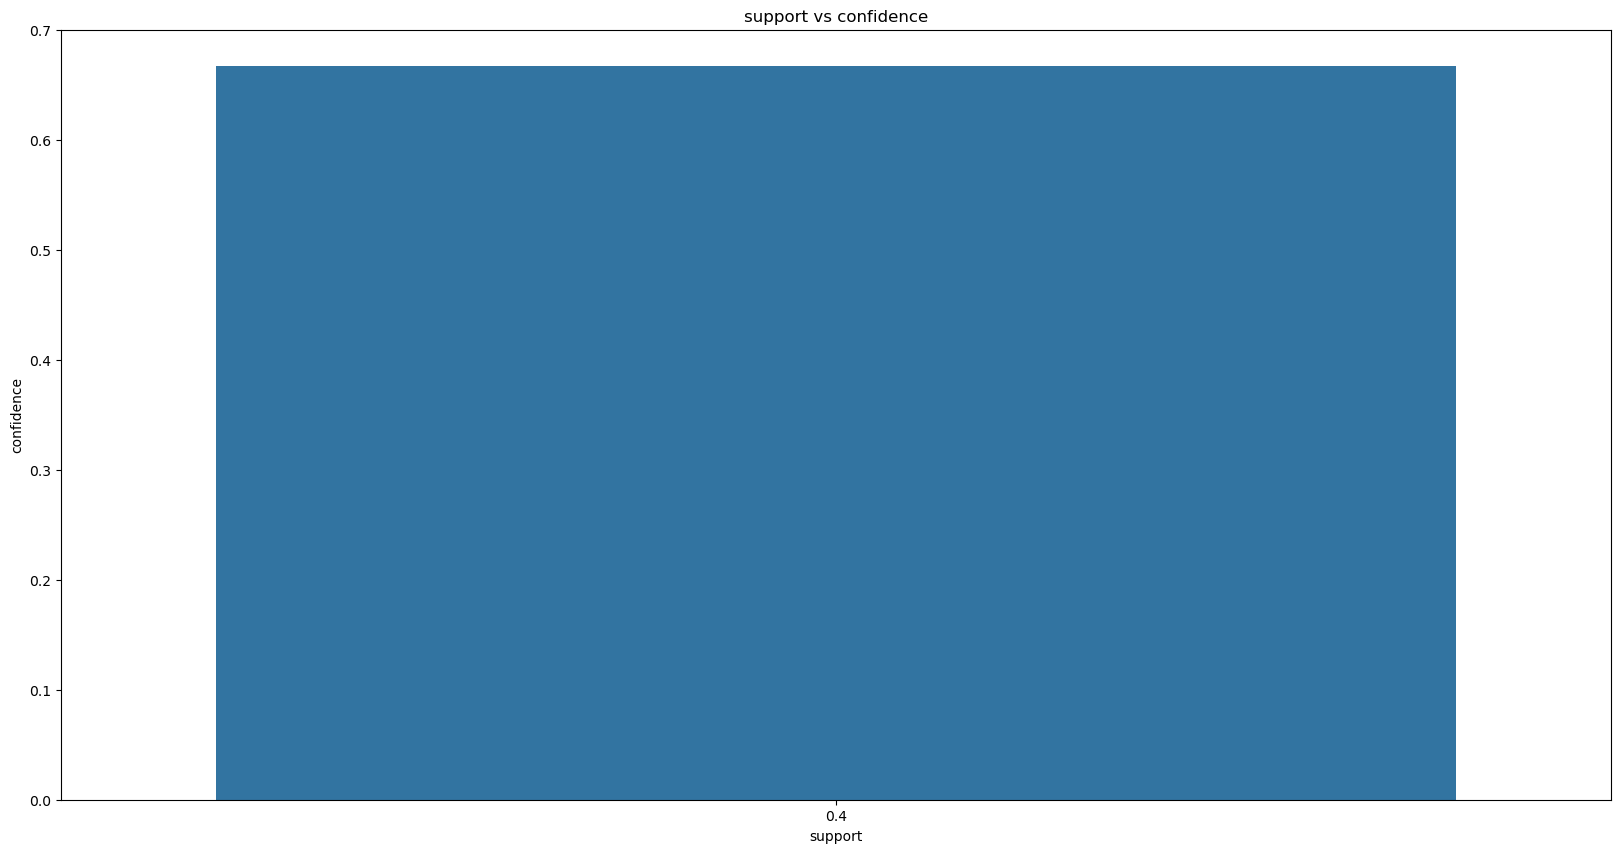

In [62]:
plt.figure(figsize = (20,10))
sns.barplot(data = lift, x = "support", y = "confidence")
plt.title("support vs confidence")
plt.show()

Text(0.5, 1.0, 'lift vs Confidence')

Text(0.5, 1.0, 'lift vs Confidence')

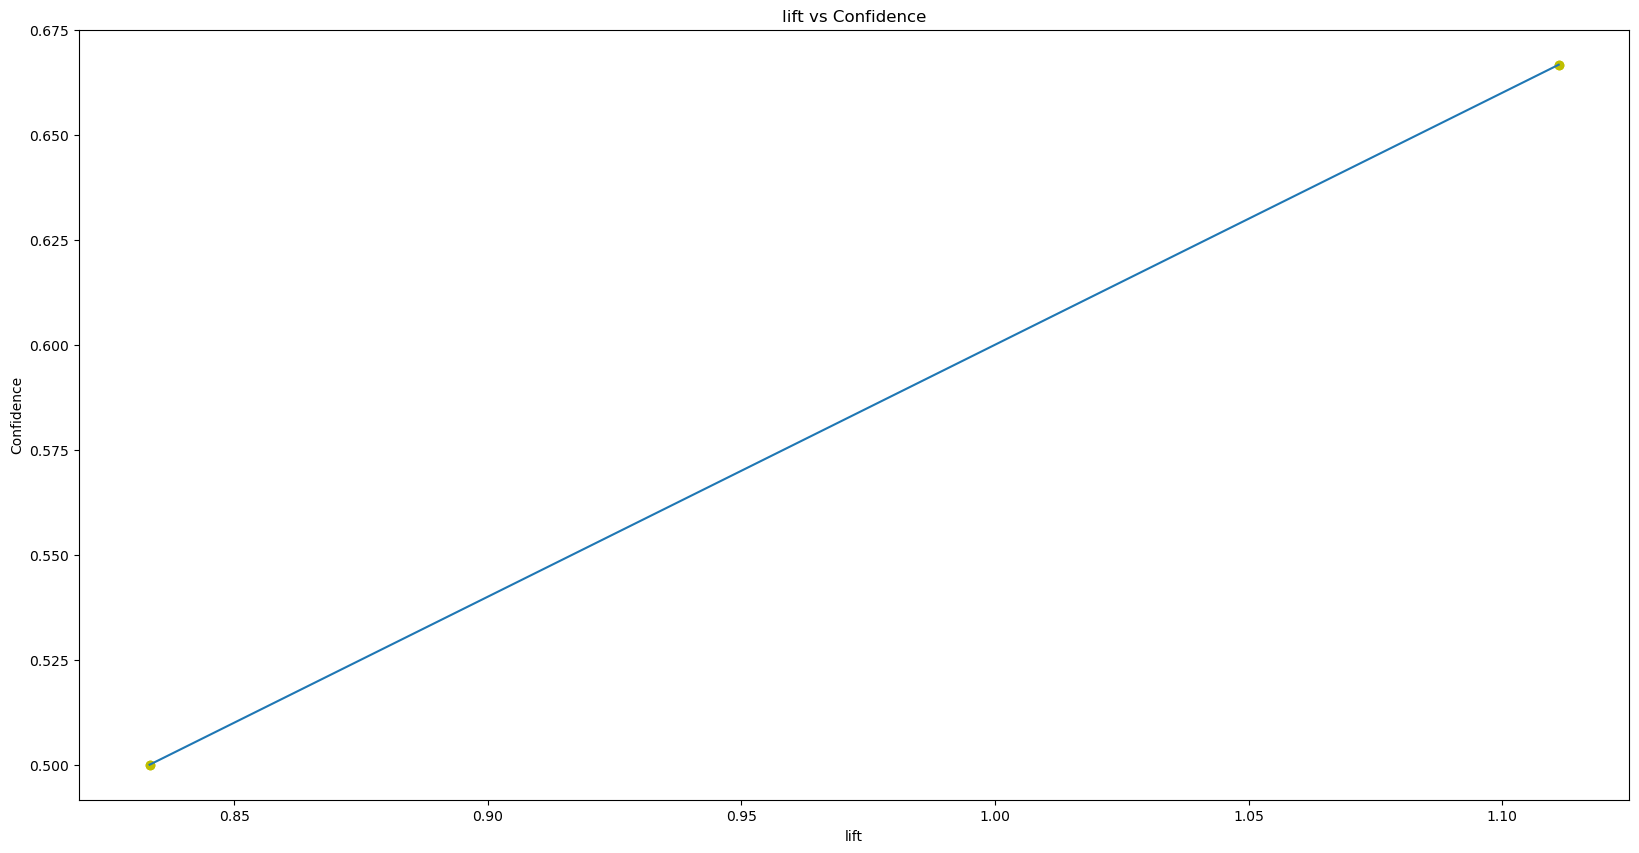

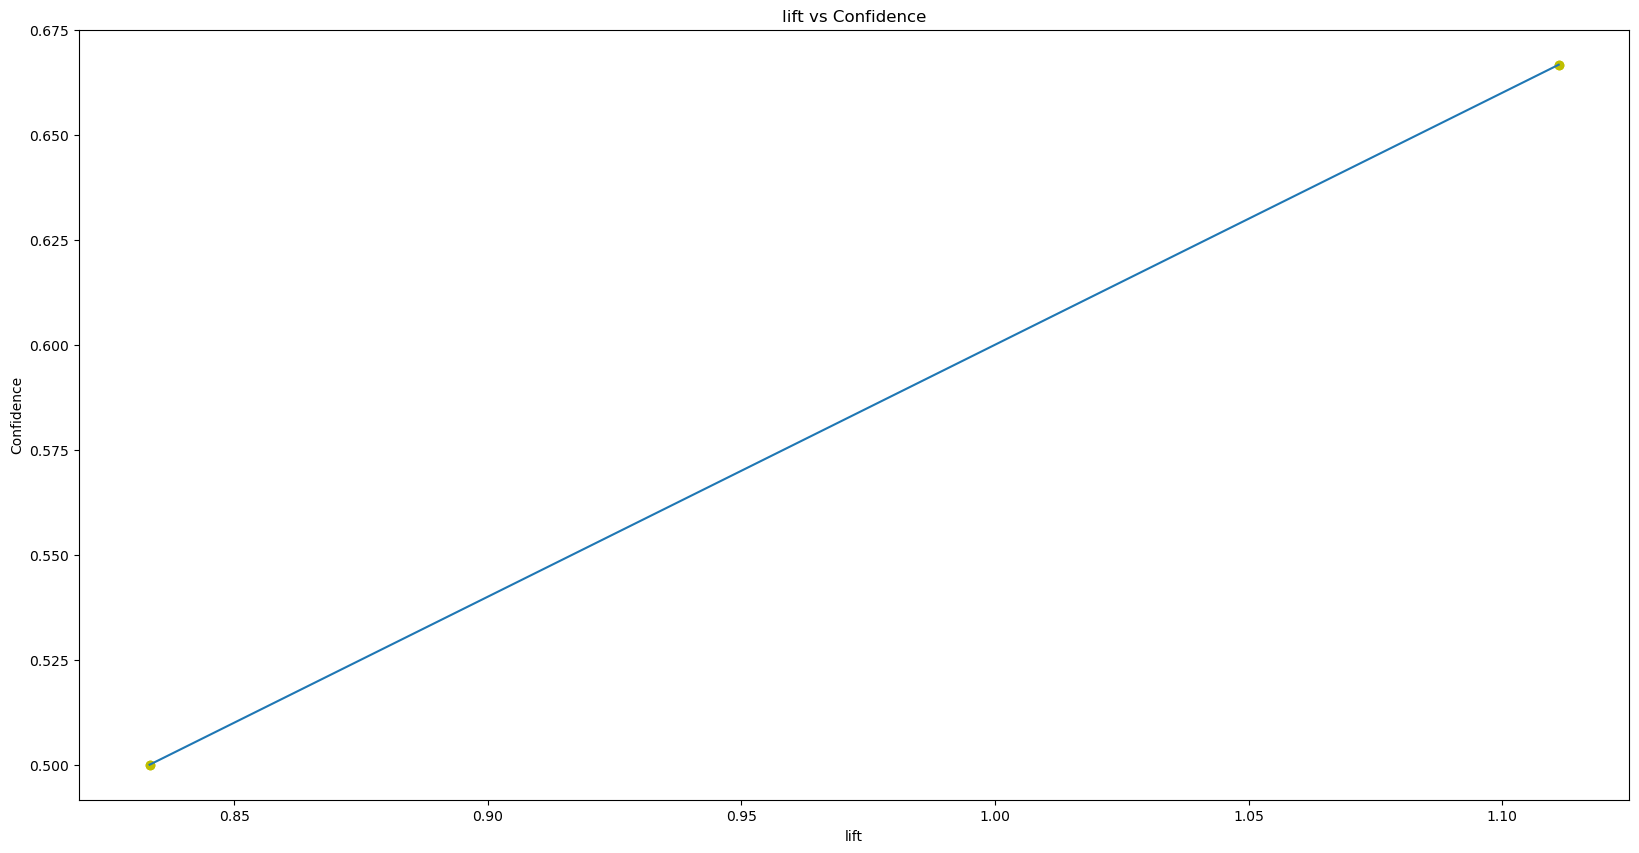

In [63]:
plt.figure(figsize = (20,10))
fit = np.polyfit(rules['lift'], rules['confidence'], 1)
fit_fn = np.poly1d(fit)
plt.plot(
    rules['lift'], 
    rules['confidence'], 
    'yo', 
    rules['lift'],
    fit_fn(rules['lift'])
        )
plt.xlabel('lift')
plt.ylabel('Confidence')
plt.title('lift vs Confidence')

In [64]:
# With 20% Support
frequent_itemsets = apriori(data, min_support = 0.2, use_colnames = True)
frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))
frequent_itemsets

,support,itemsets,length
0,0.6,(Transaction1),1
1,0.6,(Transaction2),1
2,0.6,(Transaction3),1
3,0.4,(Transaction4),1
4,0.4,"(Transaction2, Transaction1)",2
5,0.2,"(Transaction3, Transaction1)",2
6,0.4,"(Transaction1, Transaction4)",2
7,0.2,"(Transaction2, Transaction3)",2
8,0.2,"(Transaction2, Transaction4)",2
9,0.2,"(Transaction3, Transaction4)",2


,support,itemsets,length
0,0.6,(Transaction1),1
1,0.6,(Transaction2),1
2,0.6,(Transaction3),1
3,0.4,(Transaction4),1
4,0.4,"(Transaction2, Transaction1)",2
5,0.2,"(Transaction3, Transaction1)",2
6,0.4,"(Transaction1, Transaction4)",2
7,0.2,"(Transaction2, Transaction3)",2
8,0.2,"(Transaction2, Transaction4)",2
9,0.2,"(Transaction3, Transaction4)",2


In [65]:
# with 60% Confidence
rules = association_rules(frequent_itemsets, metric = 'confidence', min_threshold = 0.6)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(Transaction2),(Transaction1),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2,0.250000
1,(Transaction1),(Transaction2),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2,0.250000
2,(Transaction1),(Transaction4),0.6,0.4,0.4,0.666667,1.666667,0.16,1.8,1.000000
3,(Transaction4),(Transaction1),0.4,0.6,0.4,1.000000,1.666667,0.16,inf,0.666667
4,"(Transaction2, Transaction4)",(Transaction1),0.2,0.6,0.2,1.000000,1.666667,0.08,inf,0.500000
5,"(Transaction3, Transaction1)",(Transaction4),0.2,0.4,0.2,1.000000,2.500000,0.12,inf,0.750000
6,"(Transaction3, Transaction4)",(Transaction1),0.2,0.6,0.2,1.000000,1.666667,0.08,inf,0.500000


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(Transaction2),(Transaction1),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2,0.250000
1,(Transaction1),(Transaction2),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2,0.250000
2,(Transaction1),(Transaction4),0.6,0.4,0.4,0.666667,1.666667,0.16,1.8,1.000000
3,(Transaction4),(Transaction1),0.4,0.6,0.4,1.000000,1.666667,0.16,inf,0.666667
4,"(Transaction2, Transaction4)",(Transaction1),0.2,0.6,0.2,1.000000,1.666667,0.08,inf,0.500000
5,"(Transaction3, Transaction1)",(Transaction4),0.2,0.4,0.2,1.000000,2.500000,0.12,inf,0.750000
6,"(Transaction3, Transaction4)",(Transaction1),0.2,0.6,0.2,1.000000,1.666667,0.08,inf,0.500000


In [66]:
rules.sort_values('lift', ascending = False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
5,"(Transaction3, Transaction1)",(Transaction4),0.2,0.4,0.2,1.000000,2.500000,0.12,inf,0.750000
2,(Transaction1),(Transaction4),0.6,0.4,0.4,0.666667,1.666667,0.16,1.8,1.000000
3,(Transaction4),(Transaction1),0.4,0.6,0.4,1.000000,1.666667,0.16,inf,0.666667
4,"(Transaction2, Transaction4)",(Transaction1),0.2,0.6,0.2,1.000000,1.666667,0.08,inf,0.500000
6,"(Transaction3, Transaction4)",(Transaction1),0.2,0.6,0.2,1.000000,1.666667,0.08,inf,0.500000
0,(Transaction2),(Transaction1),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2,0.250000
1,(Transaction1),(Transaction2),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2,0.250000


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
5,"(Transaction3, Transaction1)",(Transaction4),0.2,0.4,0.2,1.000000,2.500000,0.12,inf,0.750000
2,(Transaction1),(Transaction4),0.6,0.4,0.4,0.666667,1.666667,0.16,1.8,1.000000
3,(Transaction4),(Transaction1),0.4,0.6,0.4,1.000000,1.666667,0.16,inf,0.666667
4,"(Transaction2, Transaction4)",(Transaction1),0.2,0.6,0.2,1.000000,1.666667,0.08,inf,0.500000
6,"(Transaction3, Transaction4)",(Transaction1),0.2,0.6,0.2,1.000000,1.666667,0.08,inf,0.500000
0,(Transaction2),(Transaction1),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2,0.250000
1,(Transaction1),(Transaction2),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2,0.250000


In [67]:
# Lift Ratio > 1 is a good influential rule in selecting the associated transactions
lift = rules[rules.lift > 1]
lift

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(Transaction2),(Transaction1),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2,0.250000
1,(Transaction1),(Transaction2),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2,0.250000
2,(Transaction1),(Transaction4),0.6,0.4,0.4,0.666667,1.666667,0.16,1.8,1.000000
3,(Transaction4),(Transaction1),0.4,0.6,0.4,1.000000,1.666667,0.16,inf,0.666667
4,"(Transaction2, Transaction4)",(Transaction1),0.2,0.6,0.2,1.000000,1.666667,0.08,inf,0.500000
5,"(Transaction3, Transaction1)",(Transaction4),0.2,0.4,0.2,1.000000,2.500000,0.12,inf,0.750000
6,"(Transaction3, Transaction4)",(Transaction1),0.2,0.6,0.2,1.000000,1.666667,0.08,inf,0.500000


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(Transaction2),(Transaction1),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2,0.250000
1,(Transaction1),(Transaction2),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2,0.250000
2,(Transaction1),(Transaction4),0.6,0.4,0.4,0.666667,1.666667,0.16,1.8,1.000000
3,(Transaction4),(Transaction1),0.4,0.6,0.4,1.000000,1.666667,0.16,inf,0.666667
4,"(Transaction2, Transaction4)",(Transaction1),0.2,0.6,0.2,1.000000,1.666667,0.08,inf,0.500000
5,"(Transaction3, Transaction1)",(Transaction4),0.2,0.4,0.2,1.000000,2.500000,0.12,inf,0.750000
6,"(Transaction3, Transaction4)",(Transaction1),0.2,0.6,0.2,1.000000,1.666667,0.08,inf,0.500000


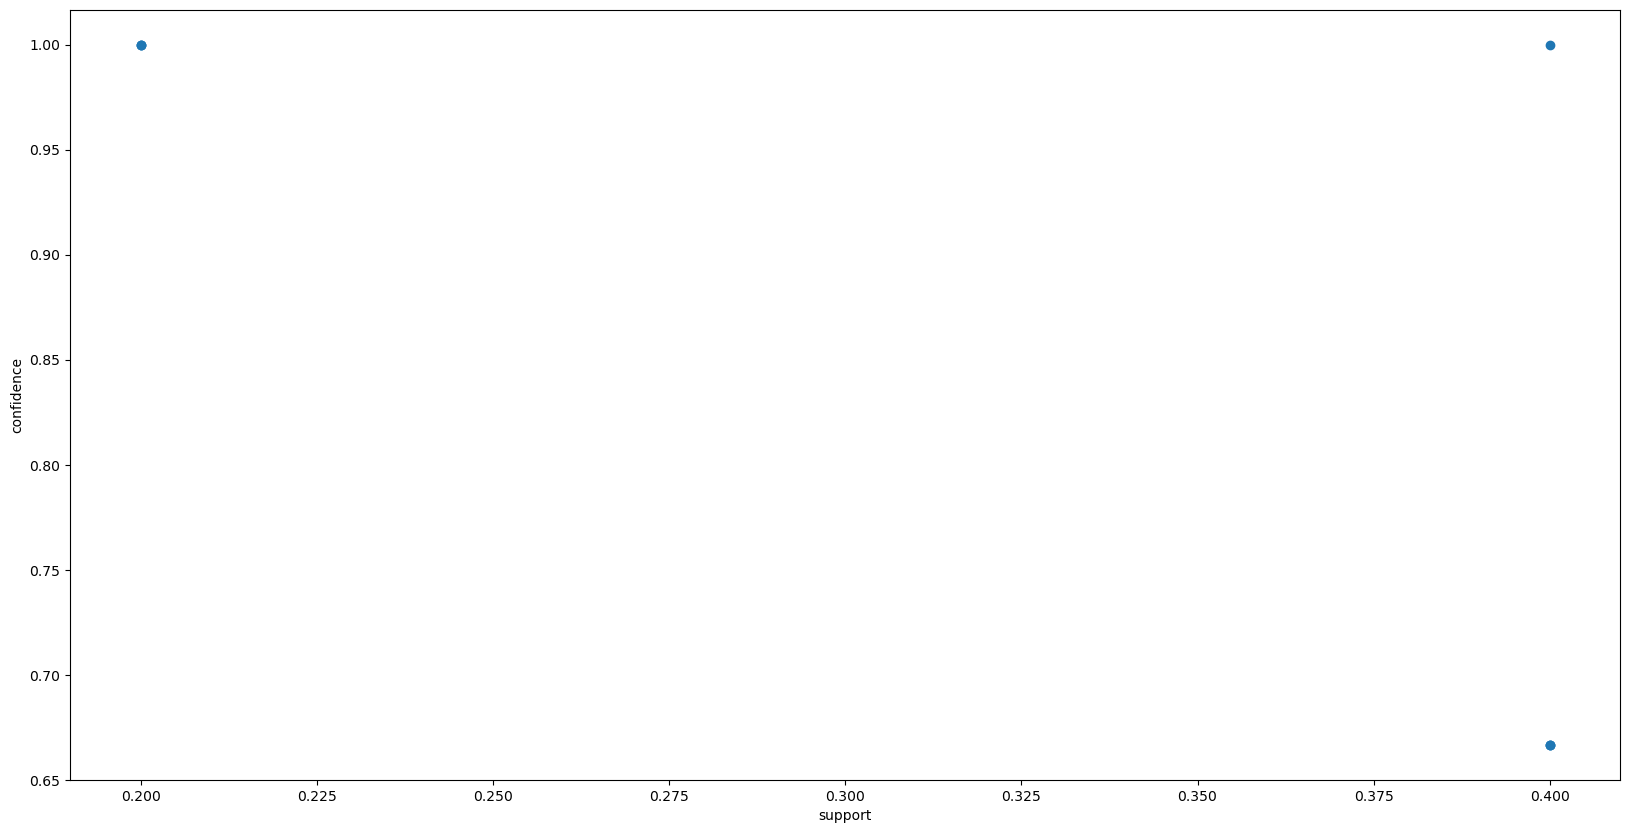

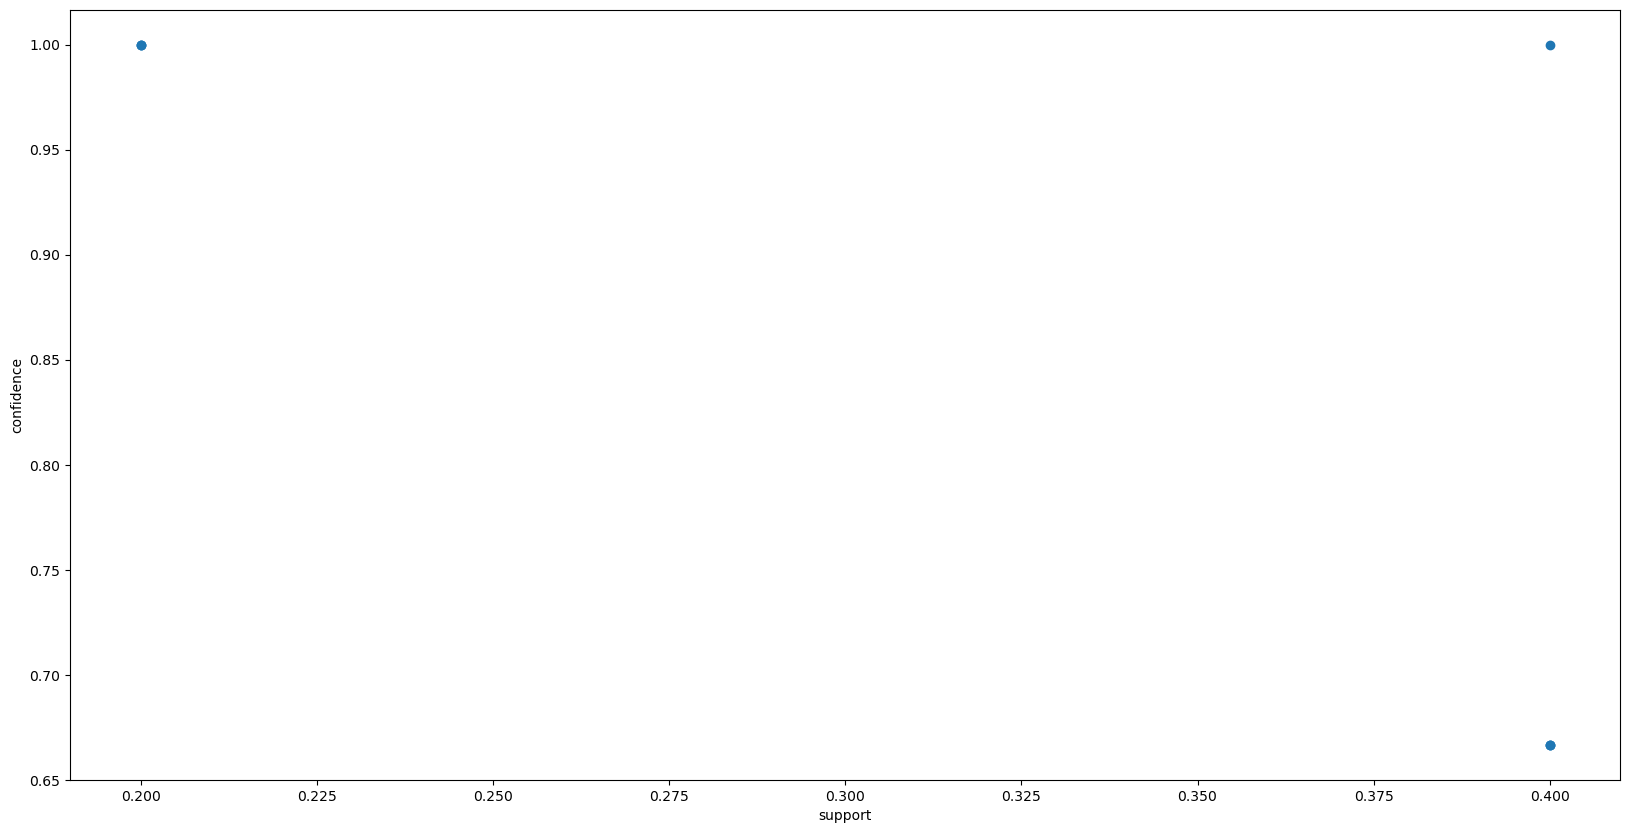

In [68]:
# visualization of obtained rule
plt.figure(figsize = (20,10))
plt.scatter(rules['support'], rules['confidence'])
plt.xlabel('support')
plt.ylabel('confidence') 
plt.show()

In [69]:
matrix = lift.pivot(index='antecedents', columns='consequents', values='lift')
matrix

consequents,(Transaction1),(Transaction2),(Transaction4)
antecedents,,,
(Transaction2),1.111111,NaN,NaN
(Transaction1),NaN,1.111111,1.666667
(Transaction4),1.666667,NaN,NaN
"(Transaction2, Transaction4)",1.666667,NaN,NaN
"(Transaction3, Transaction1)",NaN,NaN,2.500000
"(Transaction3, Transaction4)",1.666667,NaN,NaN


consequents,(Transaction1),(Transaction2),(Transaction4)
antecedents,,,
(Transaction2),1.111111,NaN,NaN
(Transaction1),NaN,1.111111,1.666667
(Transaction4),1.666667,NaN,NaN
"(Transaction2, Transaction4)",1.666667,NaN,NaN
"(Transaction3, Transaction1)",NaN,NaN,2.500000
"(Transaction3, Transaction4)",1.666667,NaN,NaN


(array([0.5, 1.5, 2.5]),
 [Text(0.5, 0, "frozenset({'Transaction1'})"),
  Text(1.5, 0, "frozenset({'Transaction2'})"),
  Text(2.5, 0, "frozenset({'Transaction4'})")])

(array([0.5, 1.5, 2.5]),
 [Text(0.5, 0, "frozenset({'Transaction1'})"),
  Text(1.5, 0, "frozenset({'Transaction2'})"),
  Text(2.5, 0, "frozenset({'Transaction4'})")])

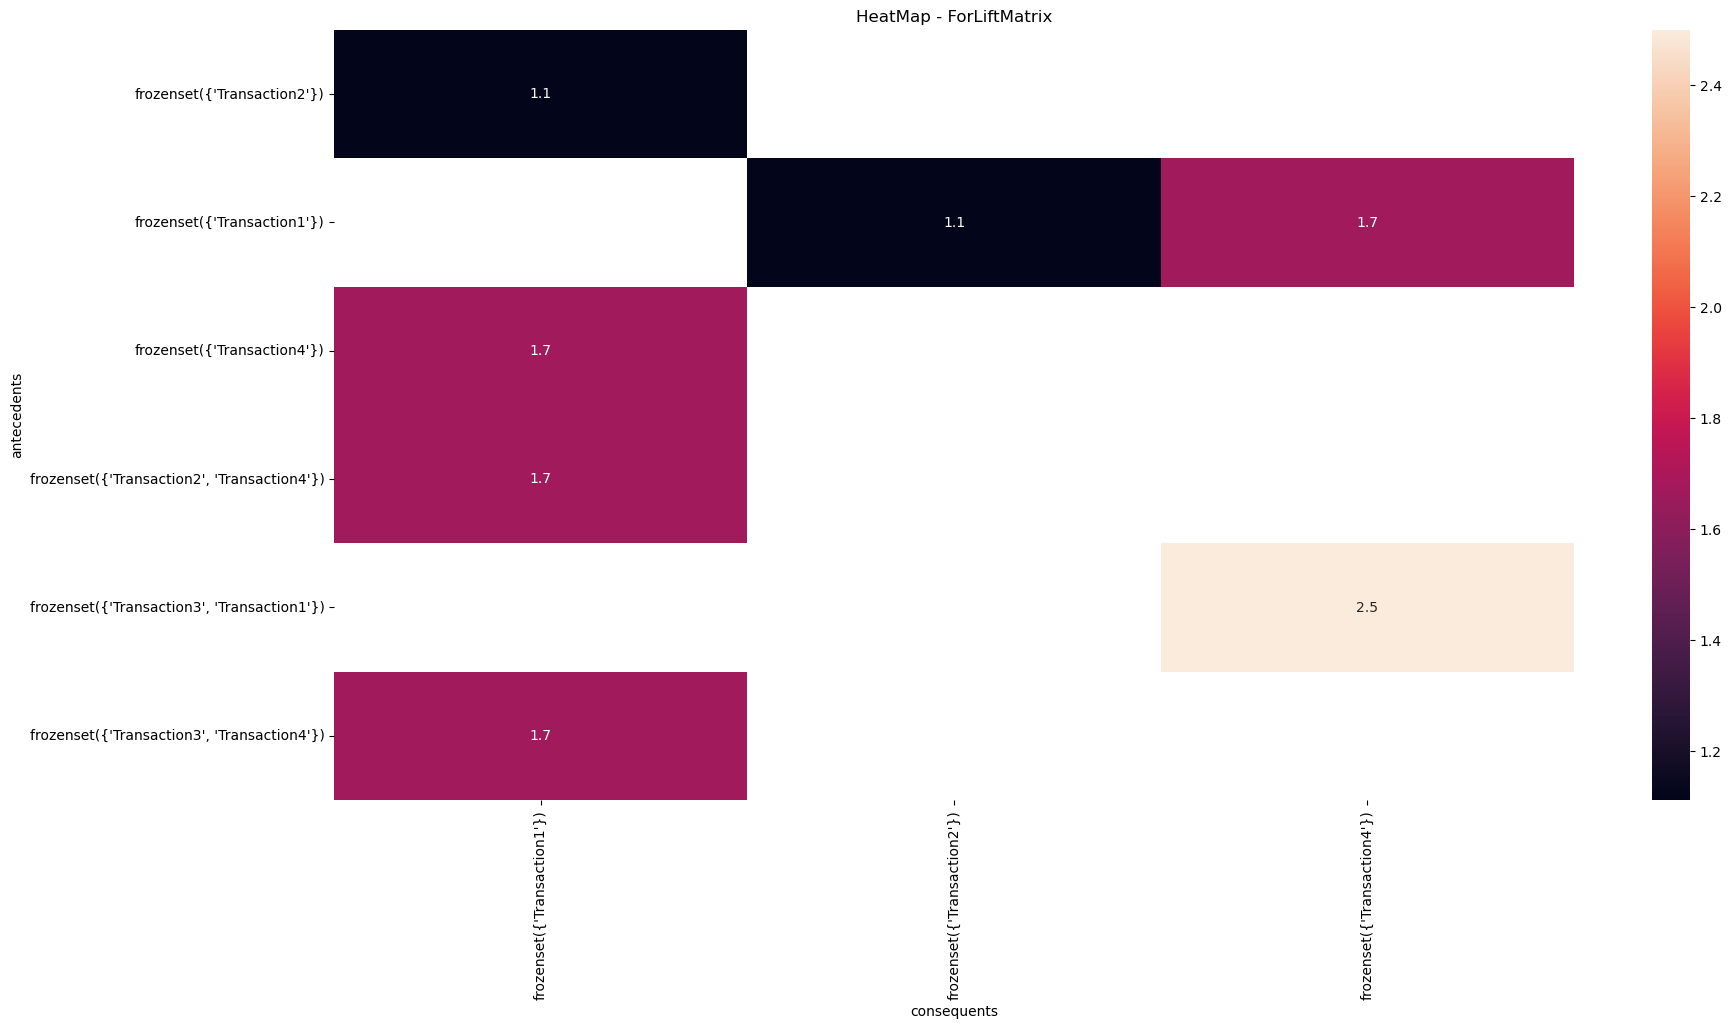

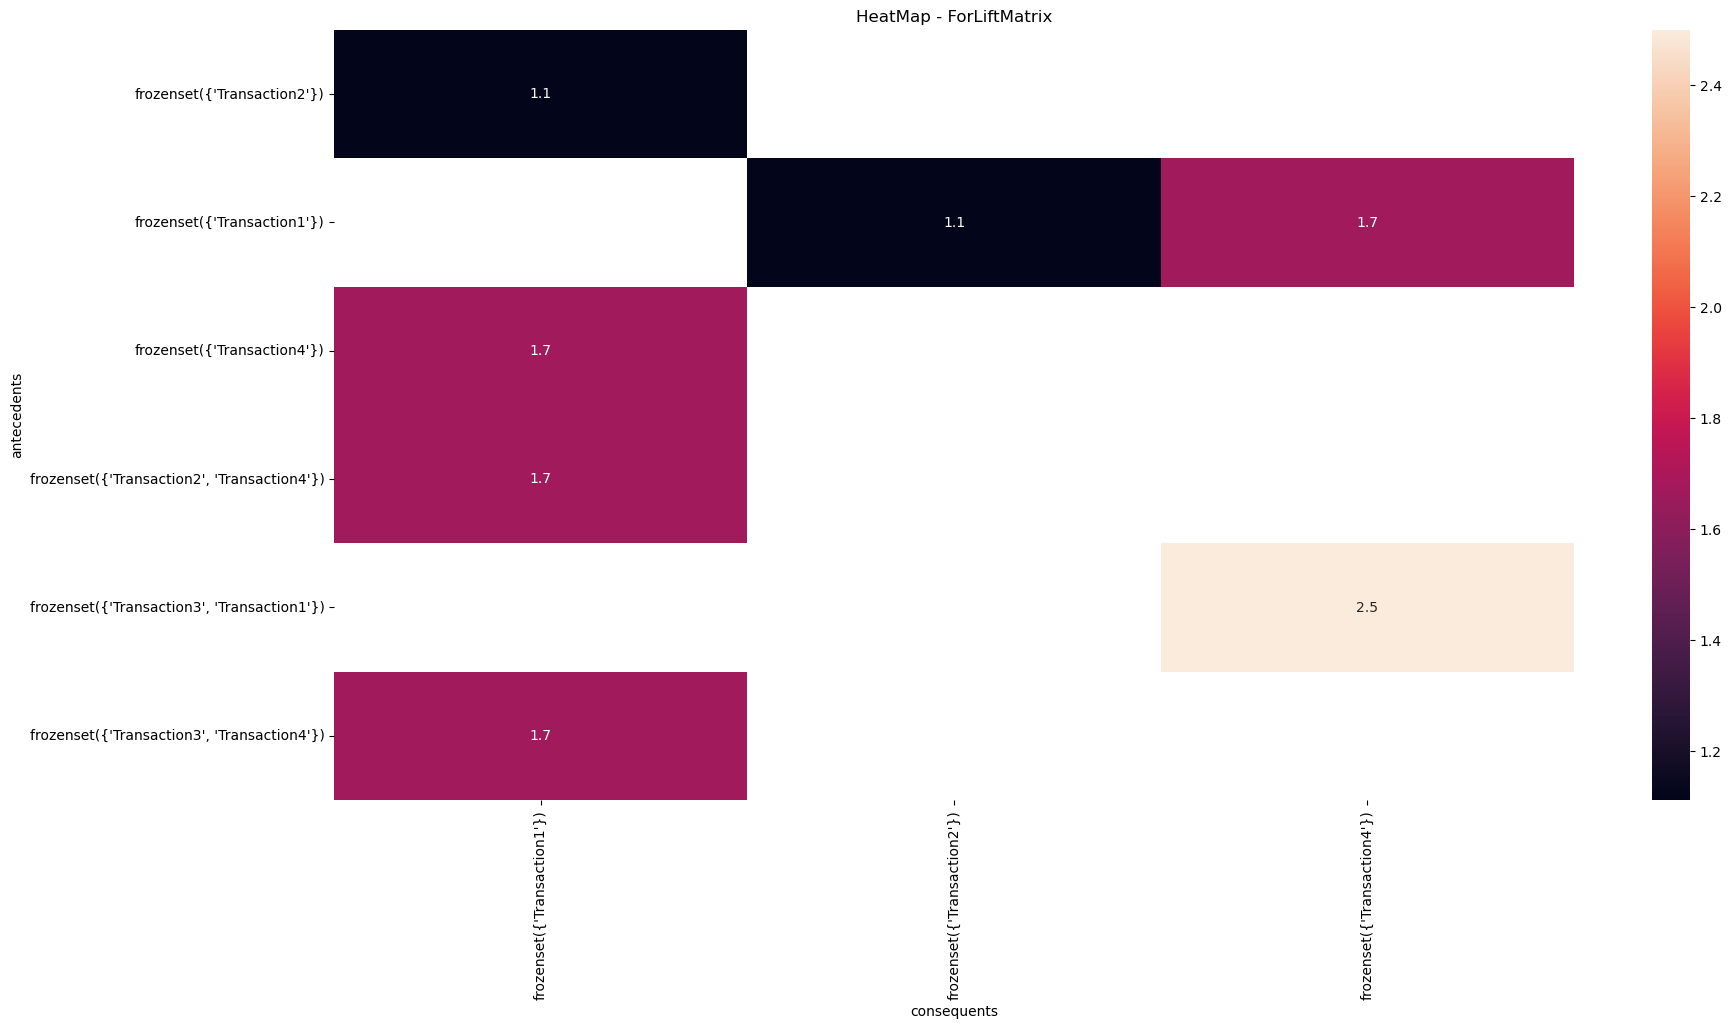

In [70]:
plt.figure(figsize = (20,10))
sns.heatmap(matrix, annot = True)
plt.title('HeatMap - ForLiftMatrix')
plt.yticks(rotation = 0)
plt.xticks(rotation = 90)

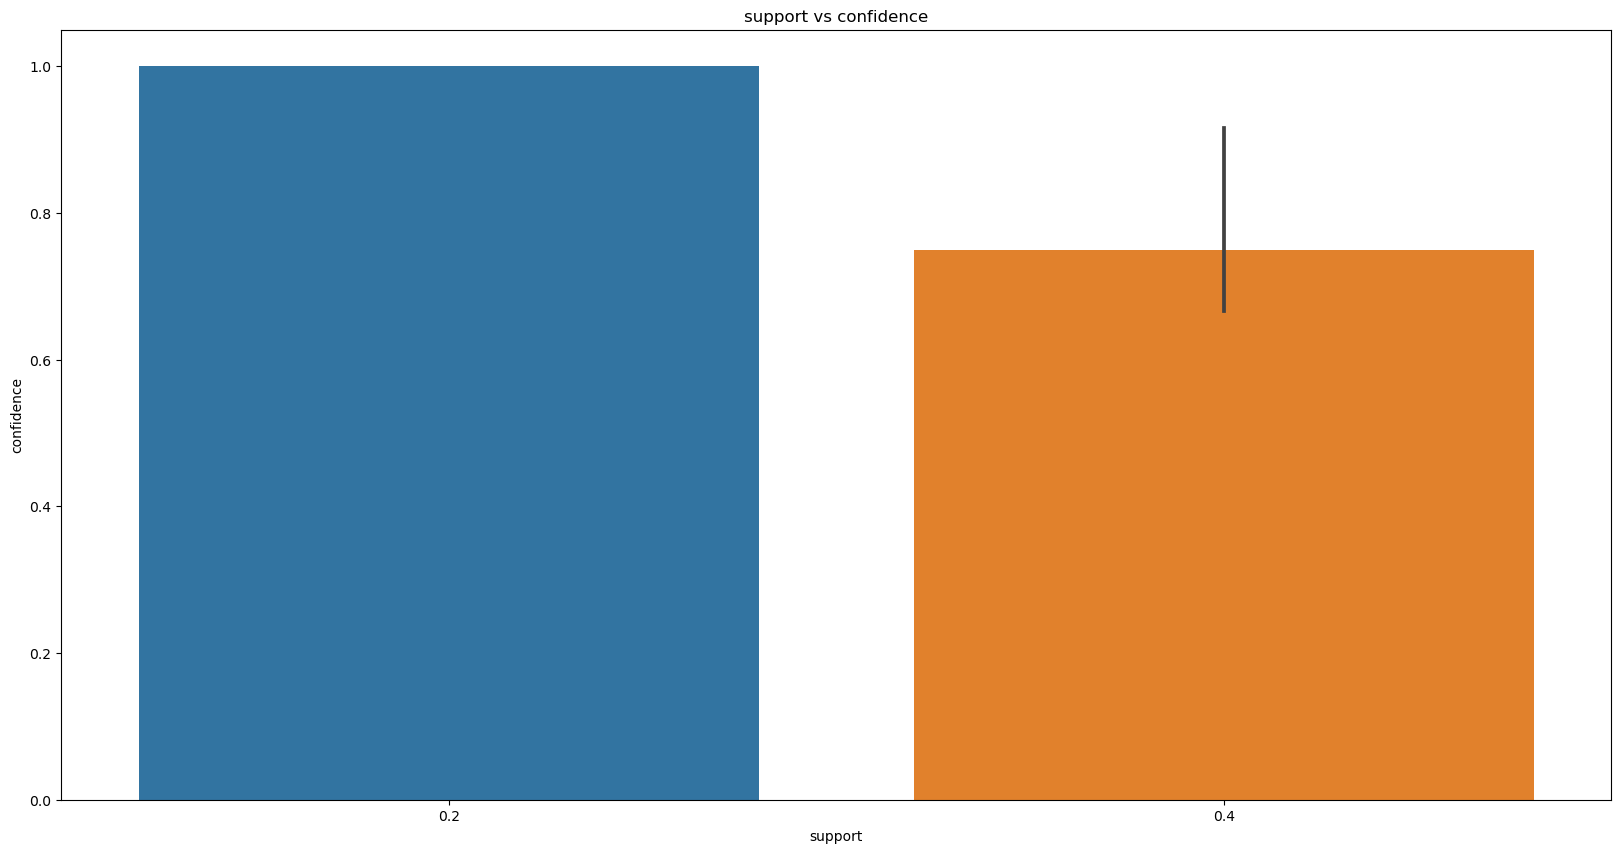

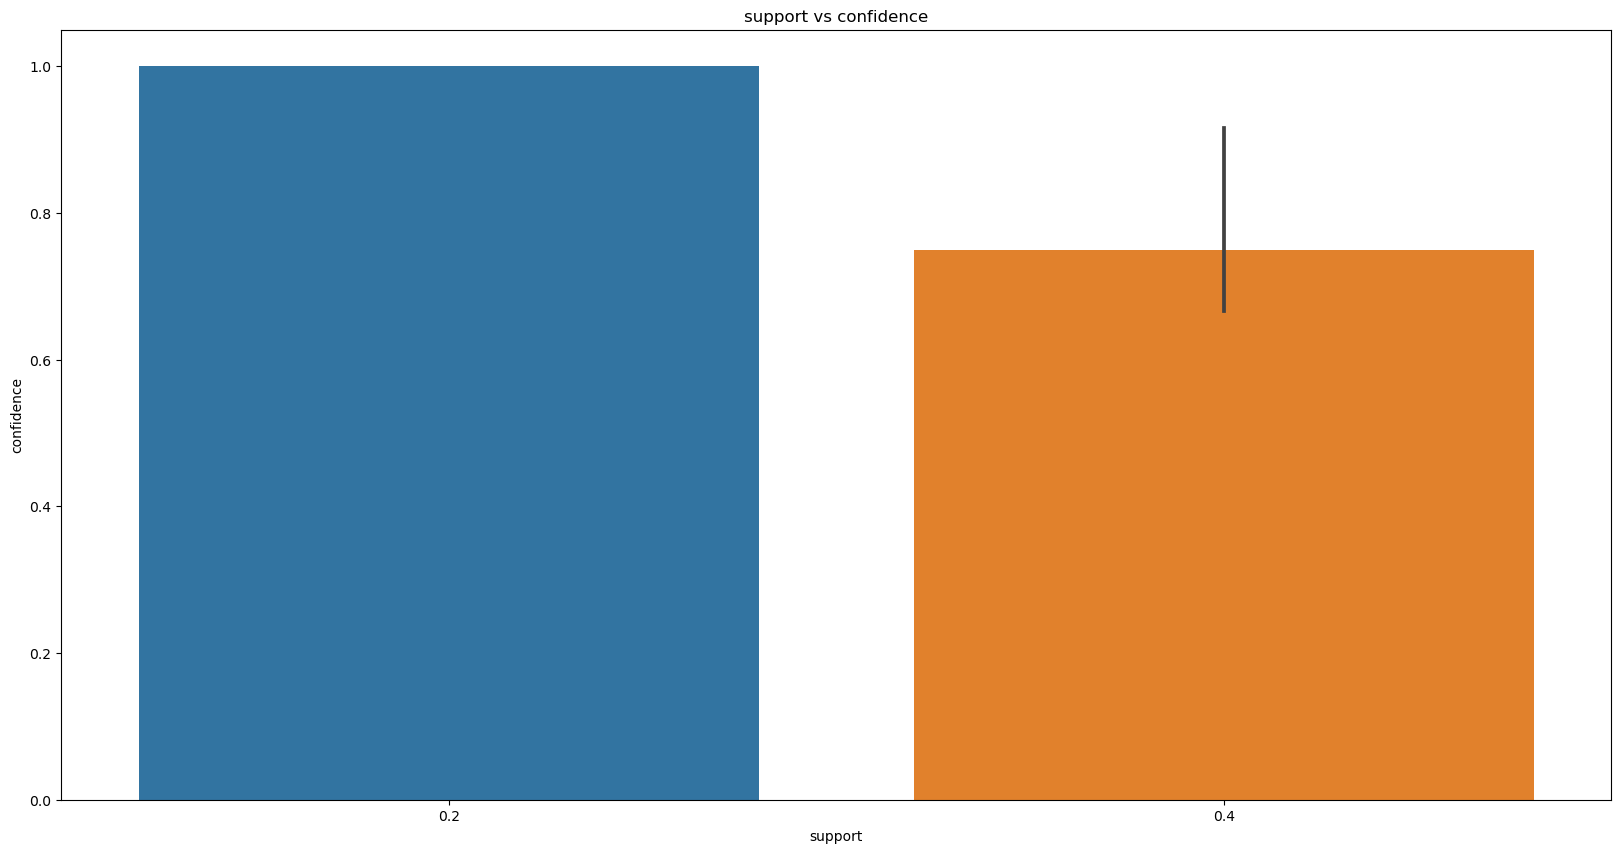

In [71]:
plt.figure(figsize = (20,10))
sns.barplot(data = lift, x = "support", y = "confidence")
plt.title("support vs confidence")
plt.show()